# Avocado Project

**Project Description**

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-

https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset
df = pd.read_csv(r"C:\Users\mohit\Desktop\data science\Machine Learning\Projects\Avocado Project - Machine Learning\avocado.csv\avocado.csv")
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
df.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)

In [6]:
df.shape

(18249, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [9]:
# Check if any null values
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
# Check duplicate rows(if any)
df.duplicated().sum()

0

In [11]:
# Observation
# There are no null values and duplicate rows

In [13]:
df.dtypes.index

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [14]:
categorical_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print('Numerical Columns: ', numerical_col)
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print('Categorical Columns: ',categorical_col)

Numerical Columns:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
Categorical Columns:  ['Date', 'type', 'region']


In [15]:
df['Date'].min()

'2015-01-04'

In [16]:
df['Date'].max()

'2018-03-25'

In [17]:
# Observation 
# We have a data of approx 3 years

In [18]:
df[['Year','Month','Date']] = df['Date'].str.split('-',expand = True)

In [19]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0   27          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1   20          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2   13          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3   06          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4   29          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Year Month  
0     8603.62       93.25          0.0  conventional  2015  Albany  2015    12  
1     9408.07       97.49          0.0  conventional  2015  Albany  2015    12  
2     8042.21      103.14          0.0  conventional  2015  Albany  2015    12  
3     5677.40      133.76          0.0  conventional  2015  Albany  2015    12  
4     5986.26      197.69          0.0  conventional  2015  Albany  2015    11

In [20]:
df[['Year','Month','Date']] = df[['Year','Month','Date']].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Year          18249 non-null  int32  
 14  Month         18249 non-null  int32  
dtypes: float64(9), int32(3), int64(1), object(2)
memory usage: 1.9+ MB


In [22]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [23]:
df.type.value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

<Axes: xlabel='type'>

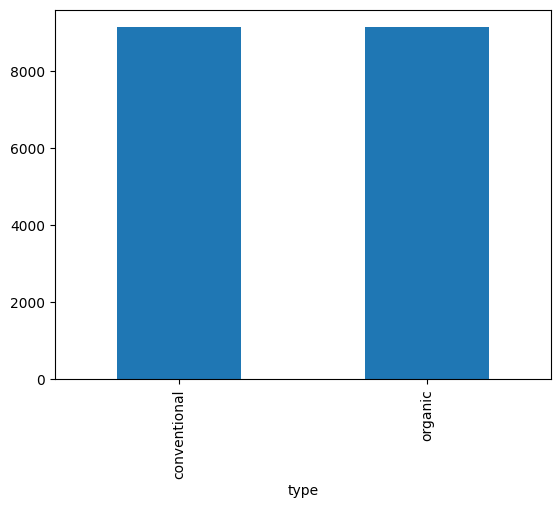

In [24]:
df.type.value_counts().plot(kind = 'bar')

In [25]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [26]:
df['type'] = lab_enc.fit_transform(df['type'])

In [27]:
df.type

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [28]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [29]:
df.region.value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

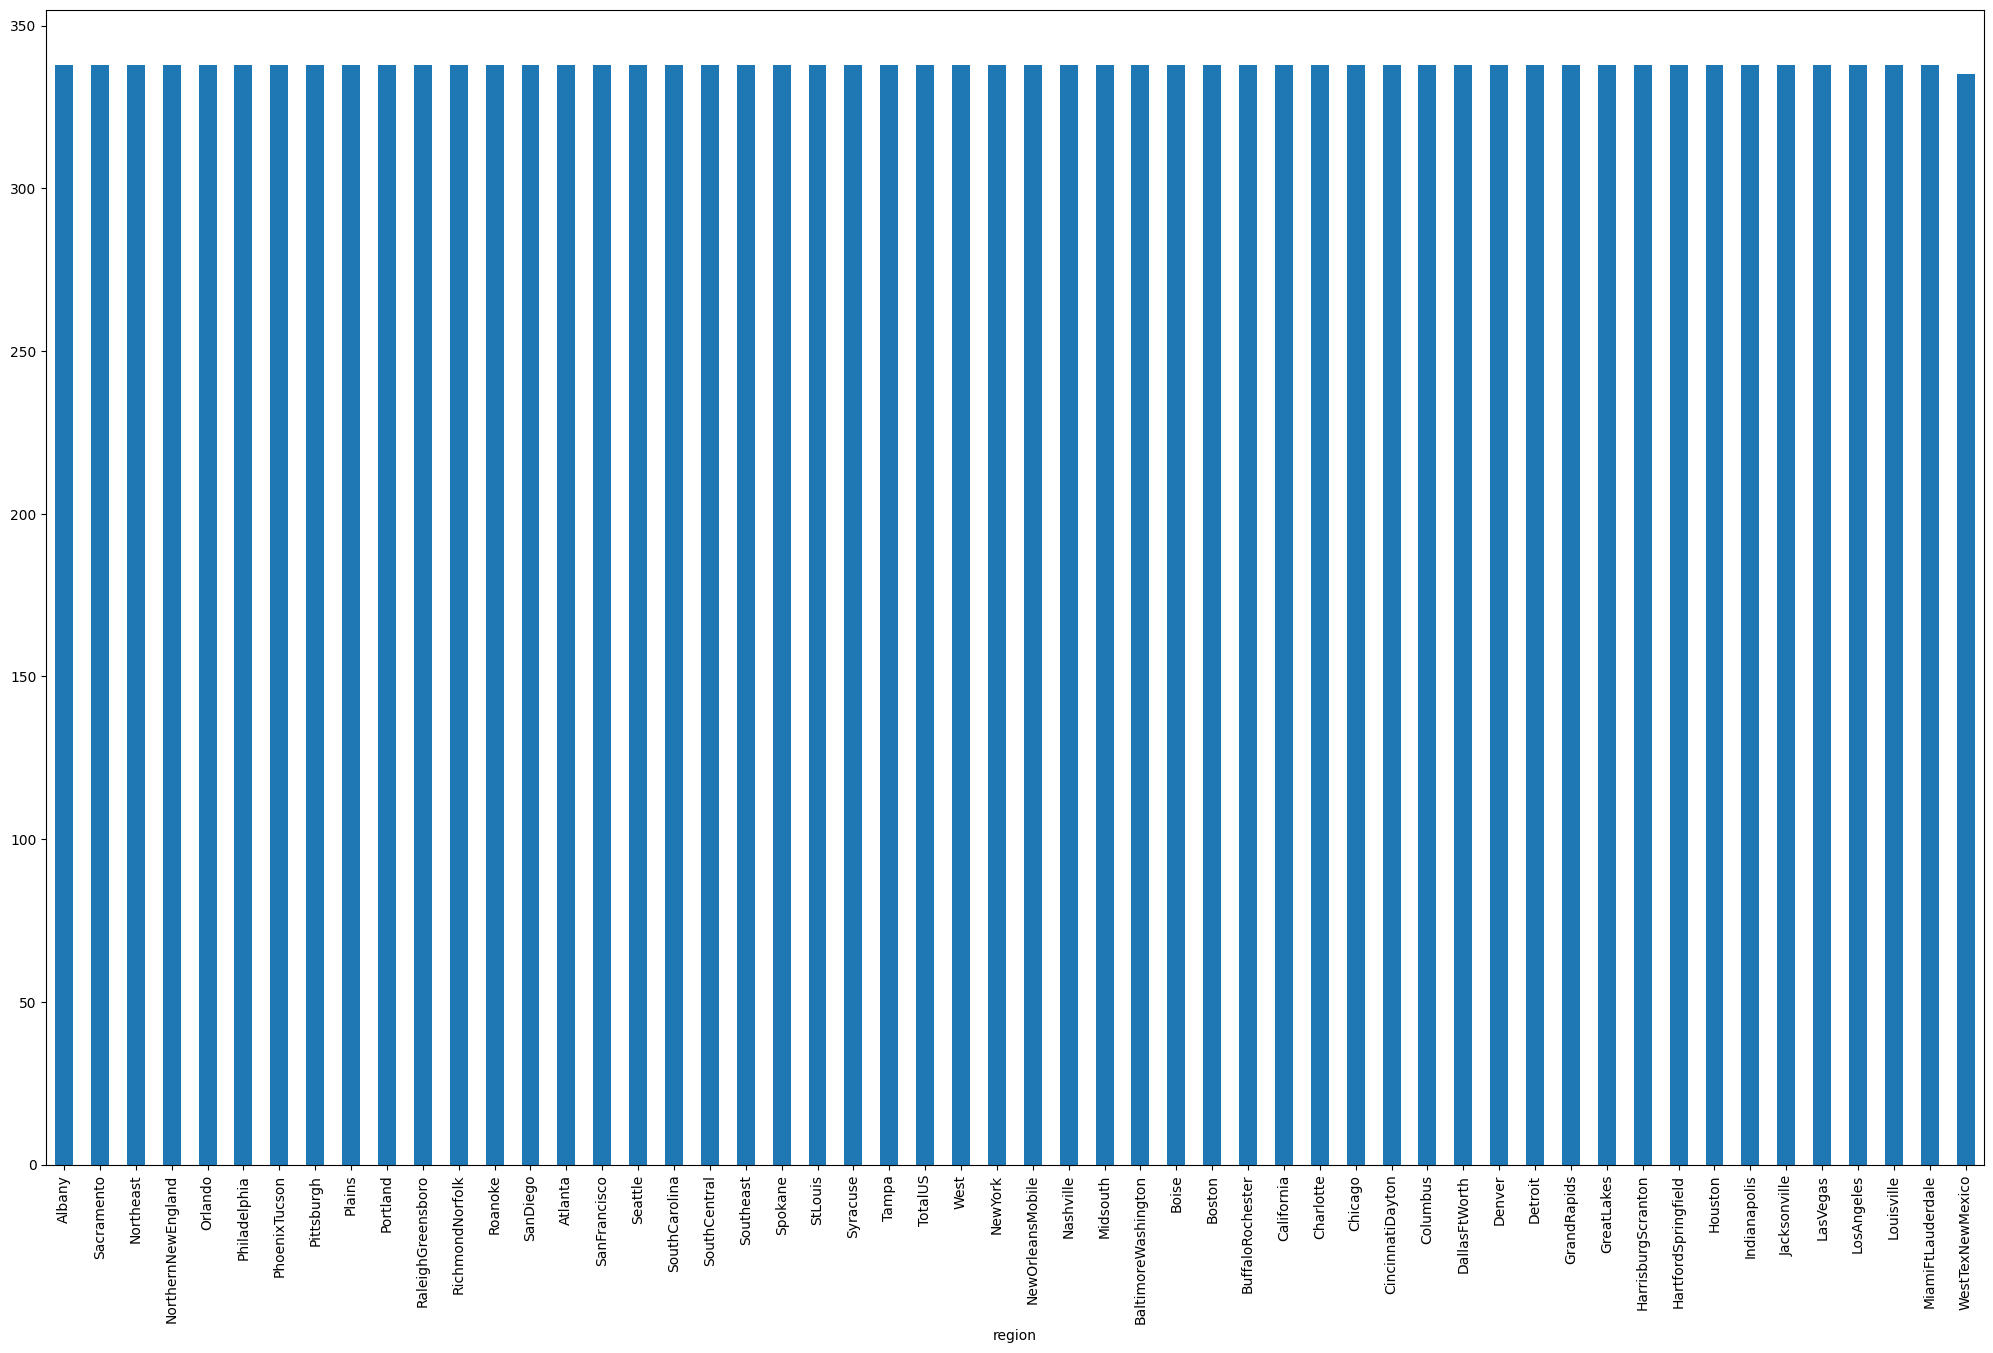

In [31]:
plt.figure(figsize = (25,15))
df.region.value_counts().plot(kind = 'bar')
plt.show()


In [32]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [35]:
df['region'] = ord_enc.fit_transform(df[['region']])
df['region'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: region, dtype: float64

In [36]:
df['region'].value_counts()

region
0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: count, dtype: int64

In [37]:
categorical_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print('Numerical Columns: ', numerical_col)
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print('Categorical Columns: ',categorical_col)

Numerical Columns:  ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'Year', 'Month']
Categorical Columns:  []


In [38]:
# Observation
# We converted all categorical columns to numeric columns

In [39]:
# Data Visualization

<Figure size 3000x3000 with 0 Axes>

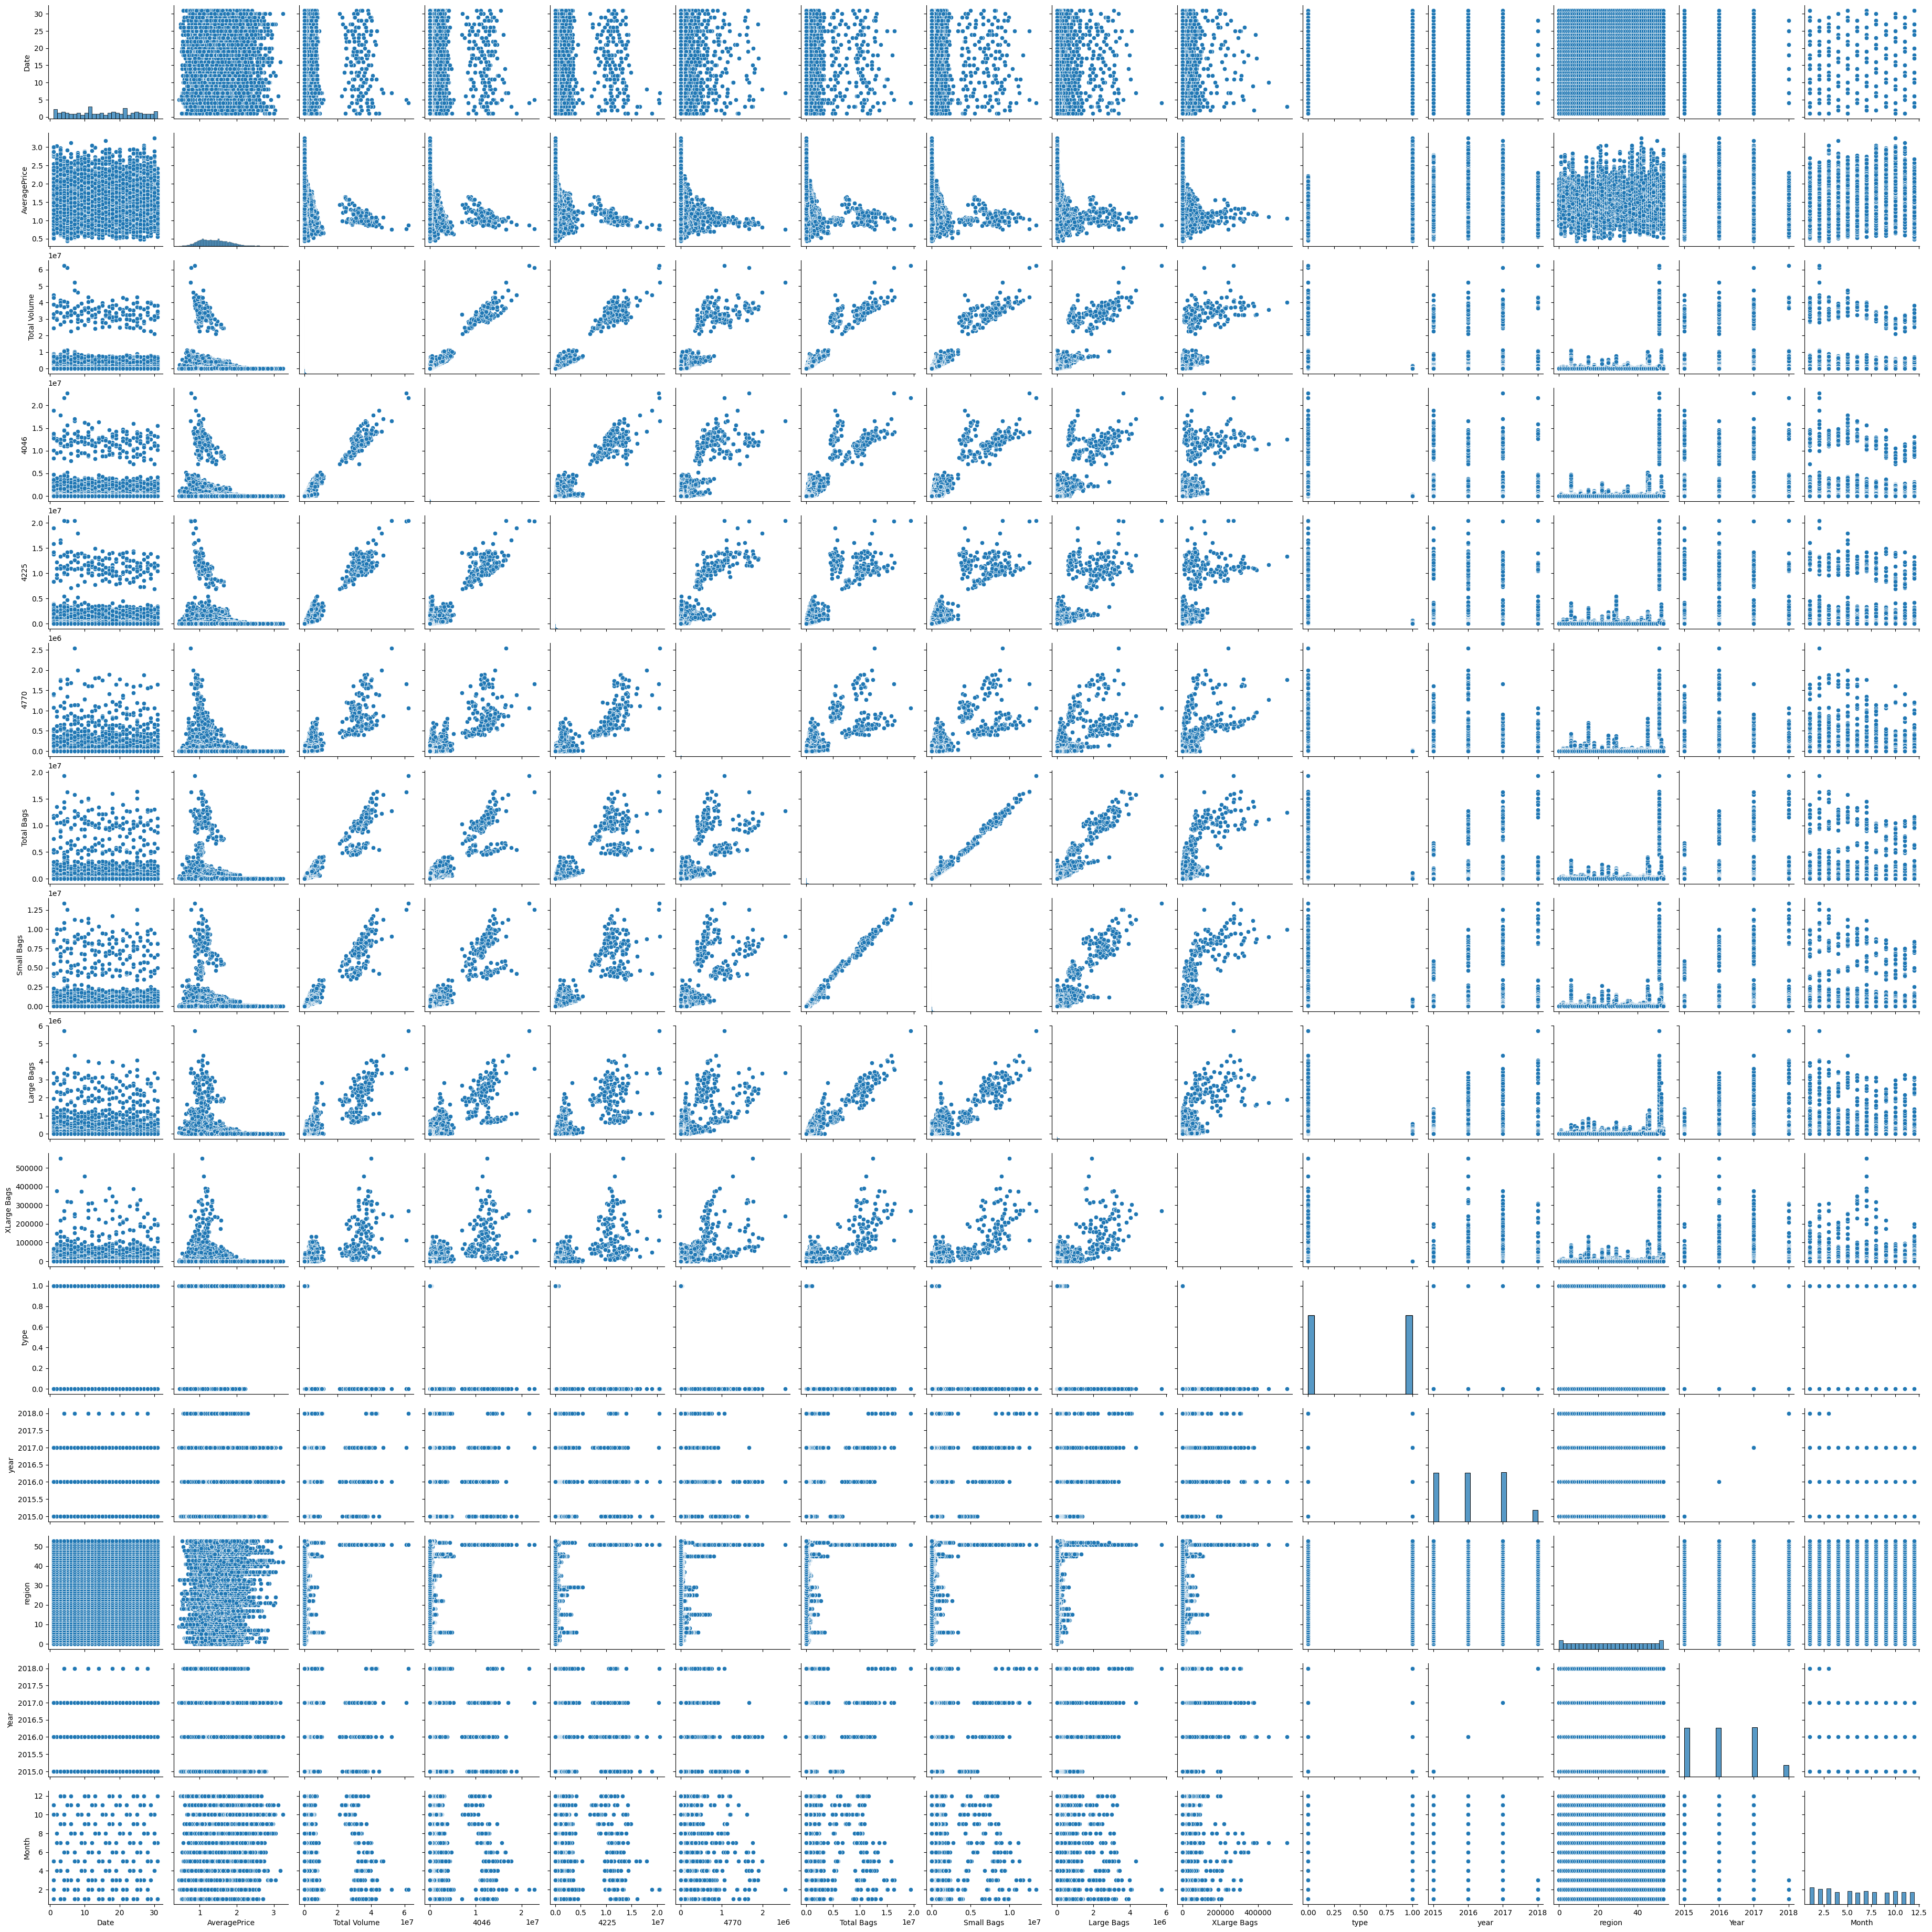

In [40]:
plt.figure(figsize = (30,30))
sns.pairplot(df)
plt.show()

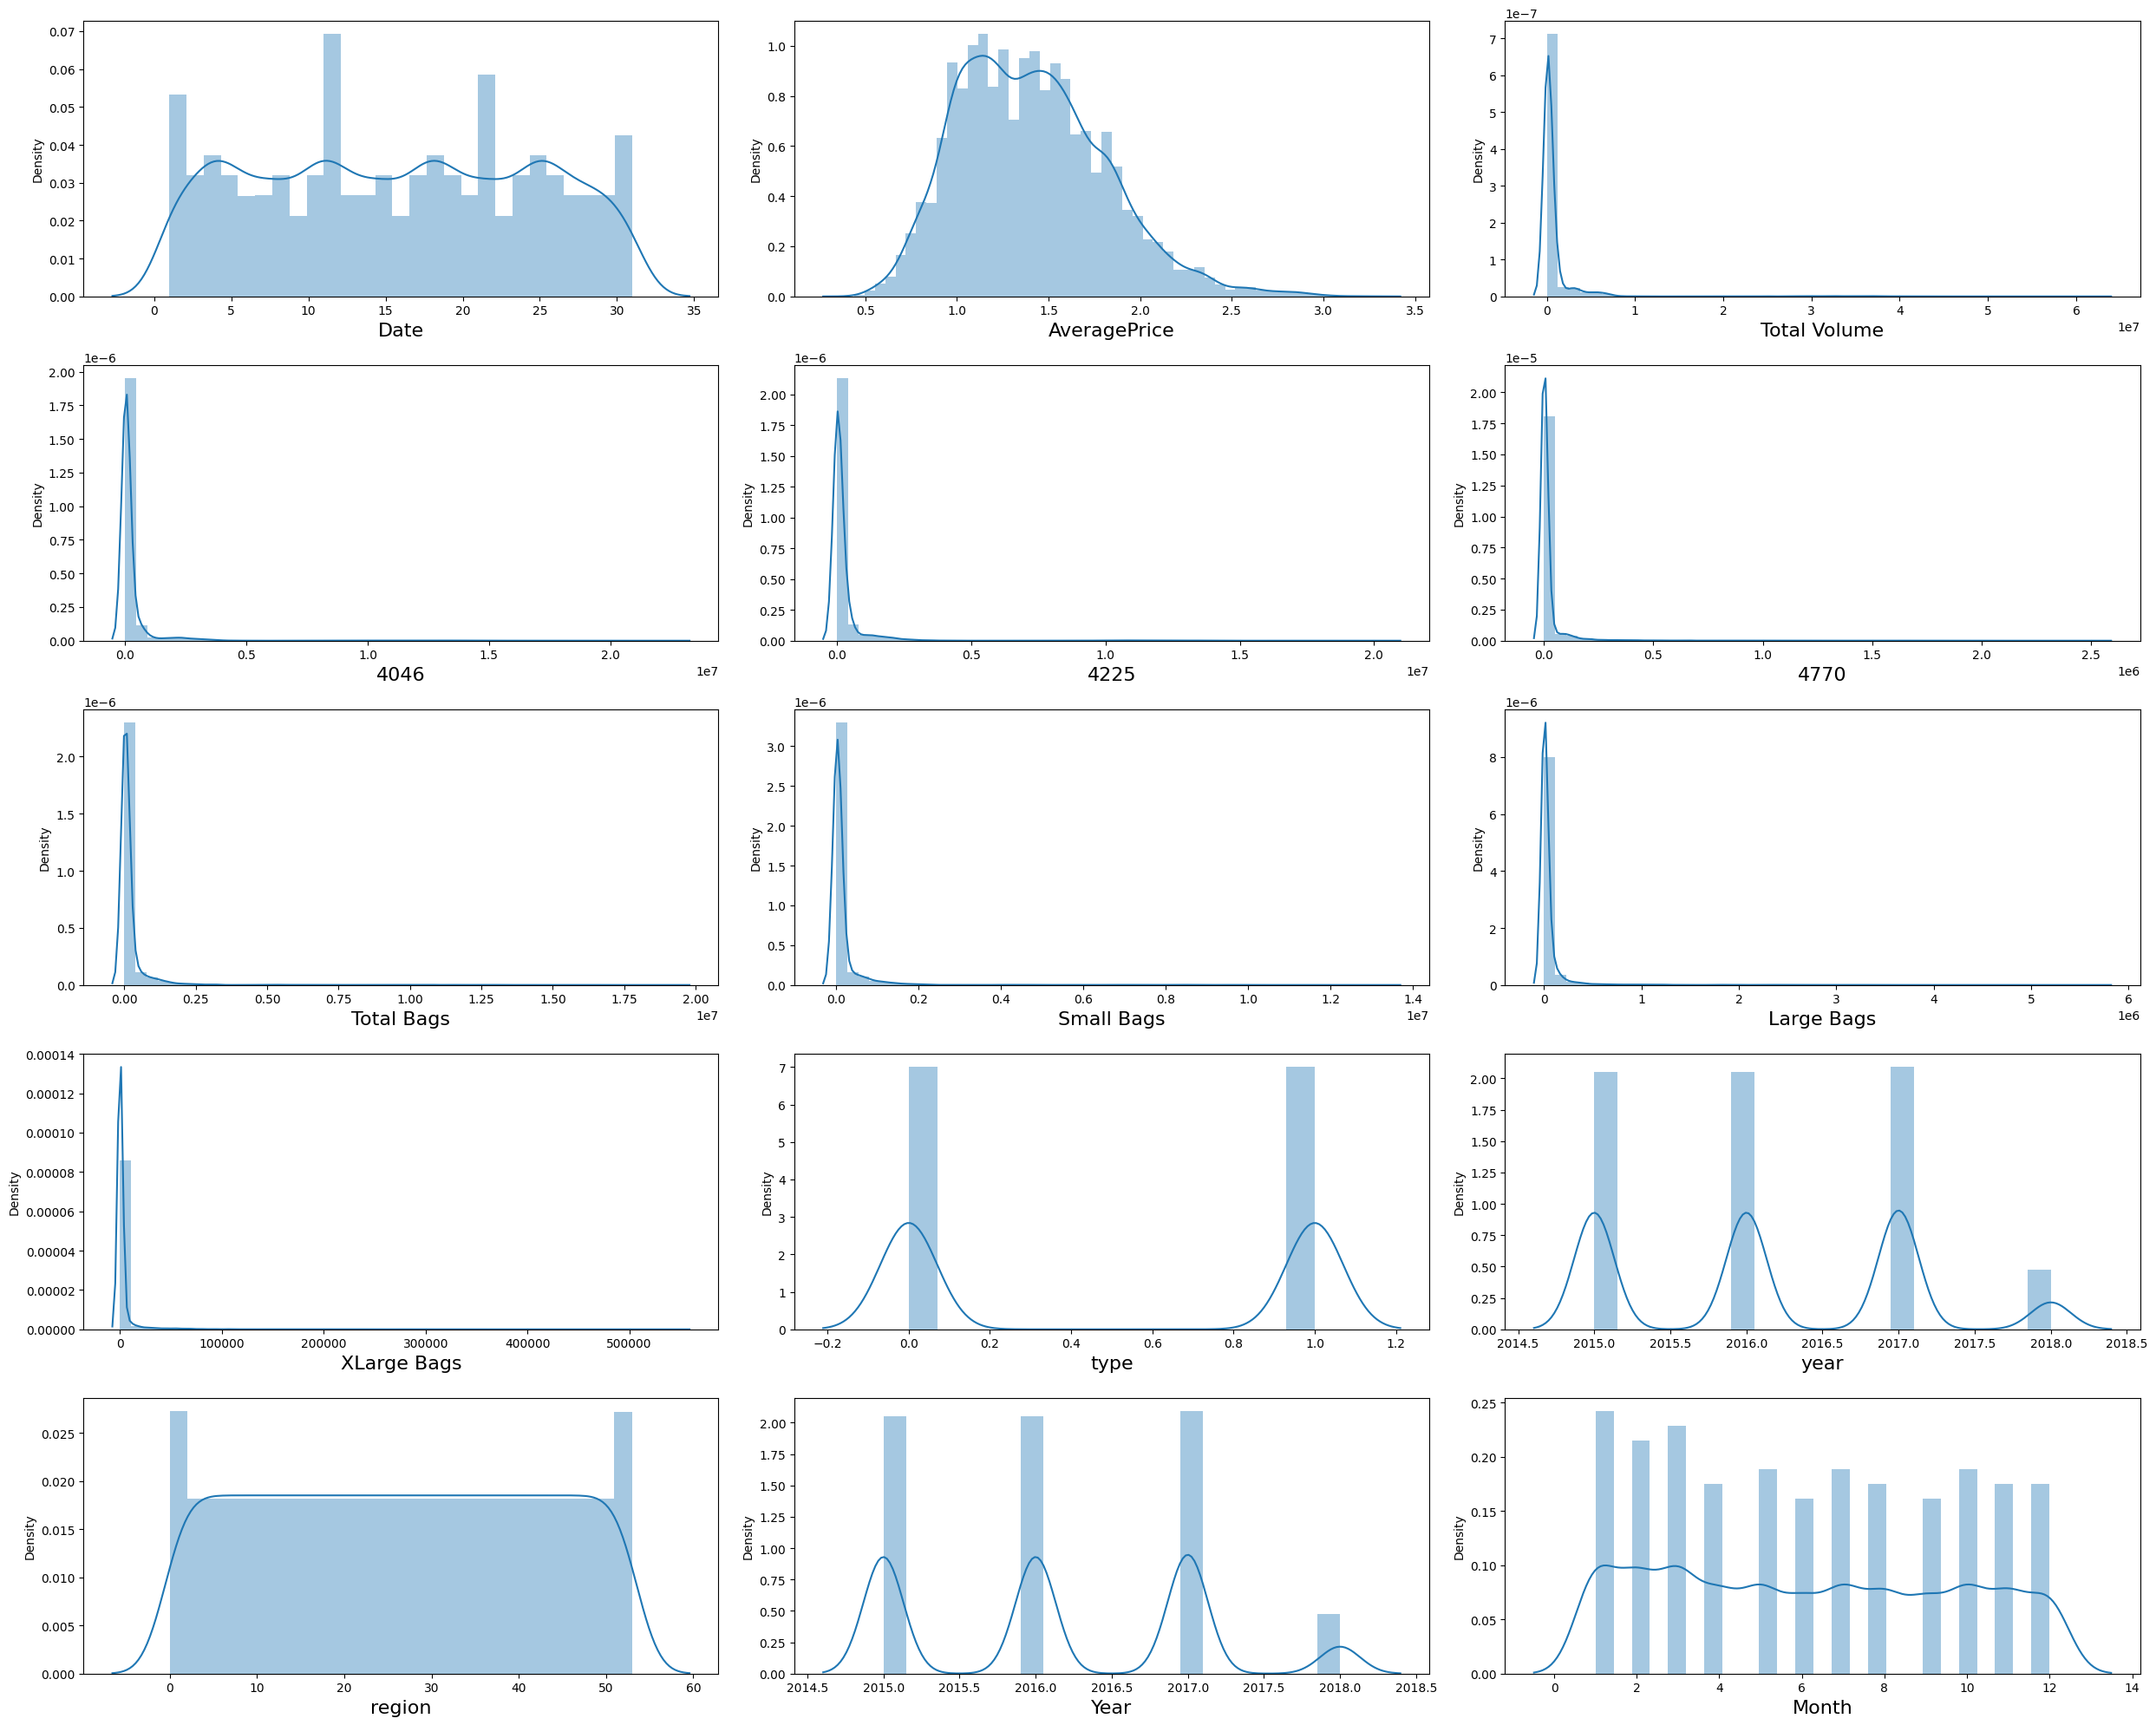

In [41]:
# Check distribution
plt.figure(figsize = (25,20))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber += 1
plt.tight_layout()
        

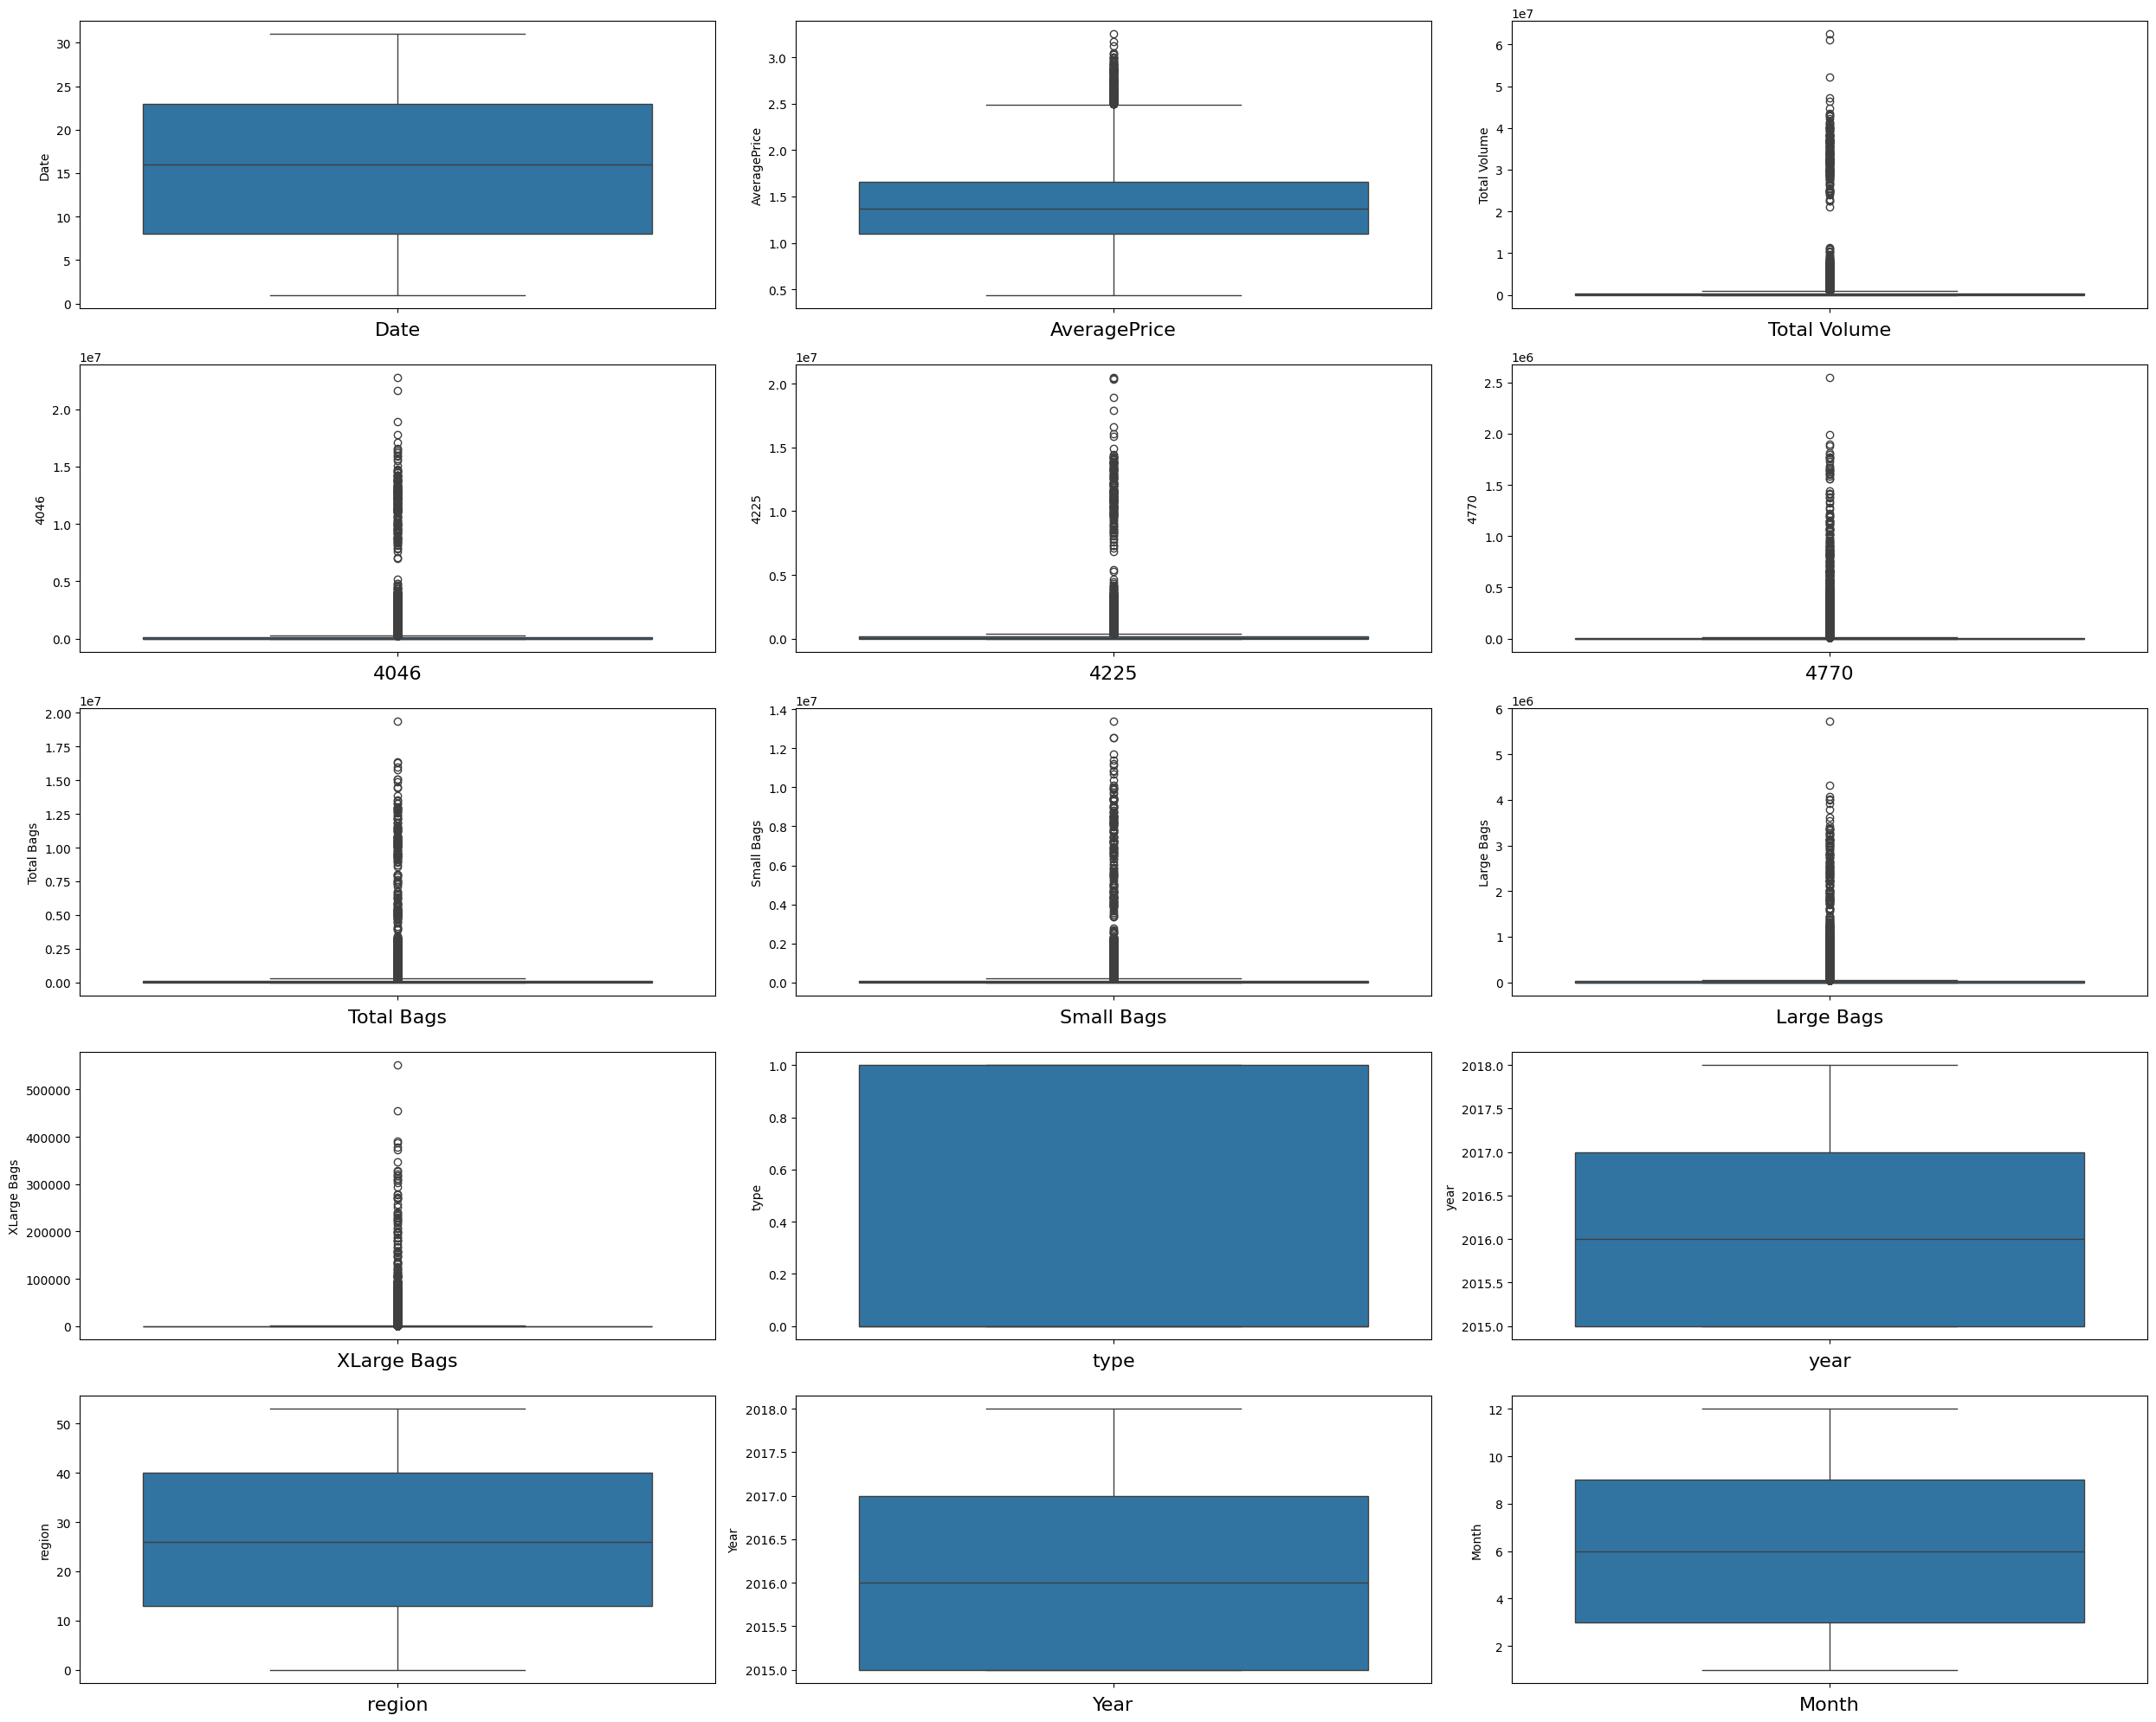

In [42]:
plt.figure(figsize = (25,20))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber += 1
plt.tight_layout()

In [43]:
# Observation
# Outliers are present in AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags

In [44]:
numerical_col

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Year',
 'Month']

In [45]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0    27          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1    20          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2    13          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3     6          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4    29          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Year  Month  
0     8603.62       93.25          0.0     0  2015     0.0  2015     12  
1     9408.07       97.49          0.0     0  2015     0.0  2015     12  
2     8042.21      103.14          0.0     0  2015     0.0  2015     12  
3     5677.40      133.76          0.0     0  2015     0.0  2015     12  
4     5986.26      197.69          0.0     0  2015     0.0  2015     11

In [46]:
df.drop(columns = ['year'],axis = 1, inplace = True)

In [48]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0    27          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1    20          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2    13          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3     6          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4    29          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8603.62       93.25          0.0     0     0.0  2015     12  
1     9408.07       97.49          0.0     0     0.0  2015     12  
2     8042.21      103.14          0.0     0     0.0  2015     12  
3     5677.40      133.76          0.0     0     0.0  2015     12  
4     5986.26      197.69          0.0     0     0.0  2015     11

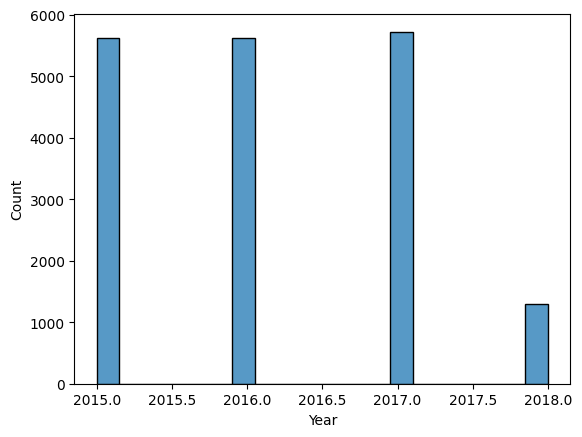

In [49]:
sns.histplot(df['Year'])
plt.show()

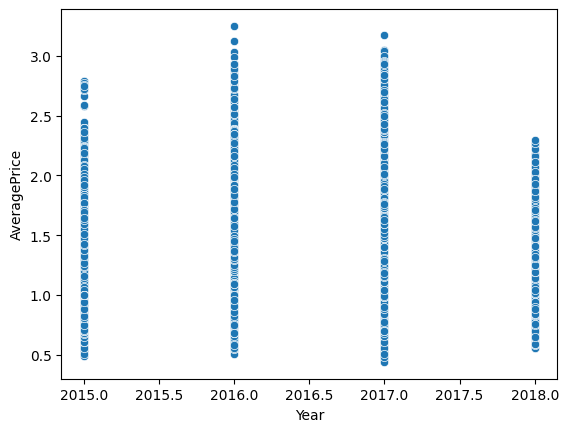

In [50]:
sns.scatterplot(x = 'Year', y = 'AveragePrice',data = df)
plt.show()

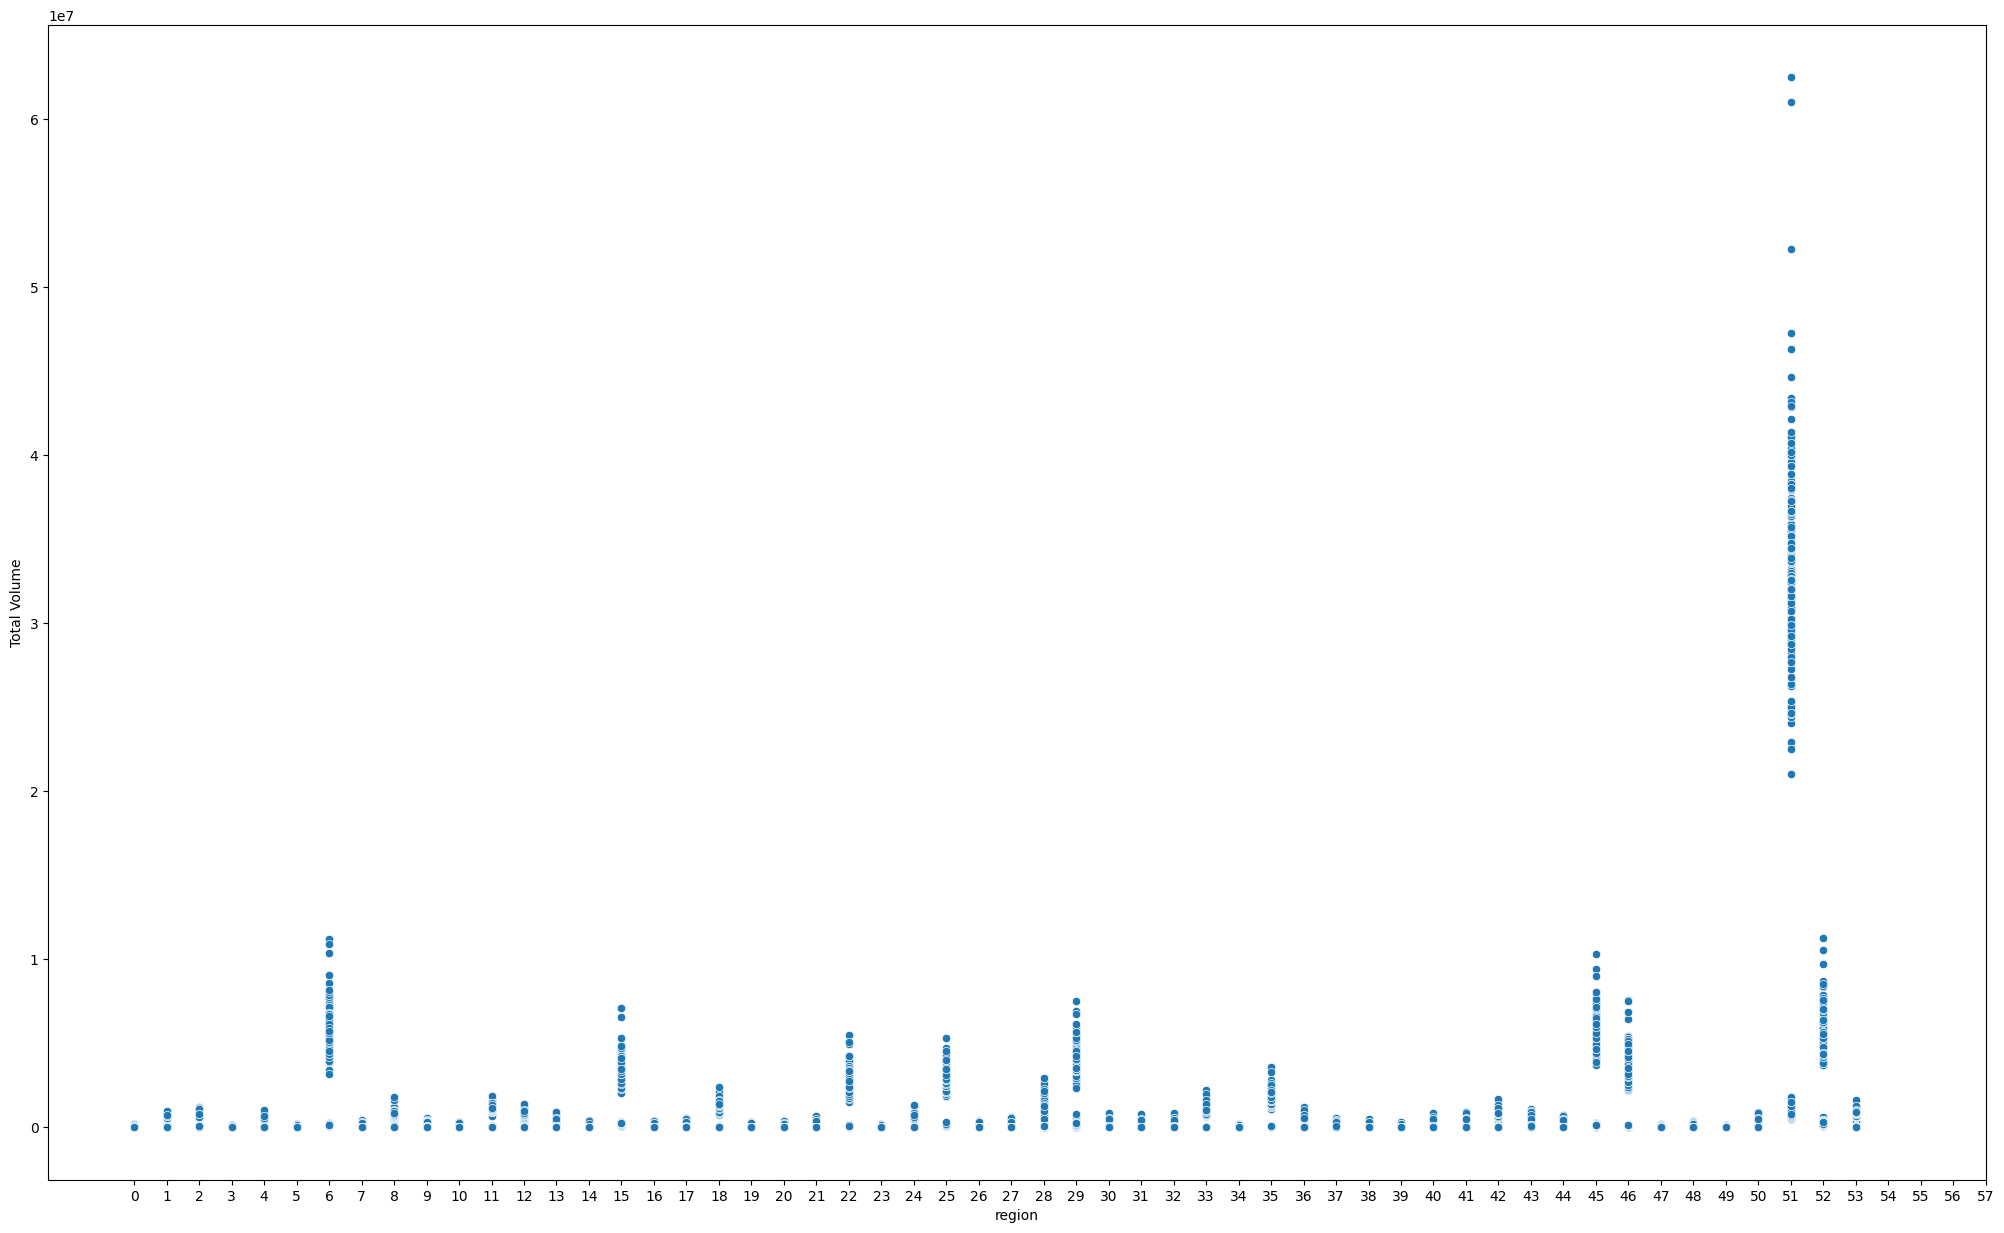

In [57]:
plt.figure(figsize = (25,15))
sns.scatterplot(x = df['region'],y = df['Total Volume'])
plt.xticks(range(0,58))
plt.show()

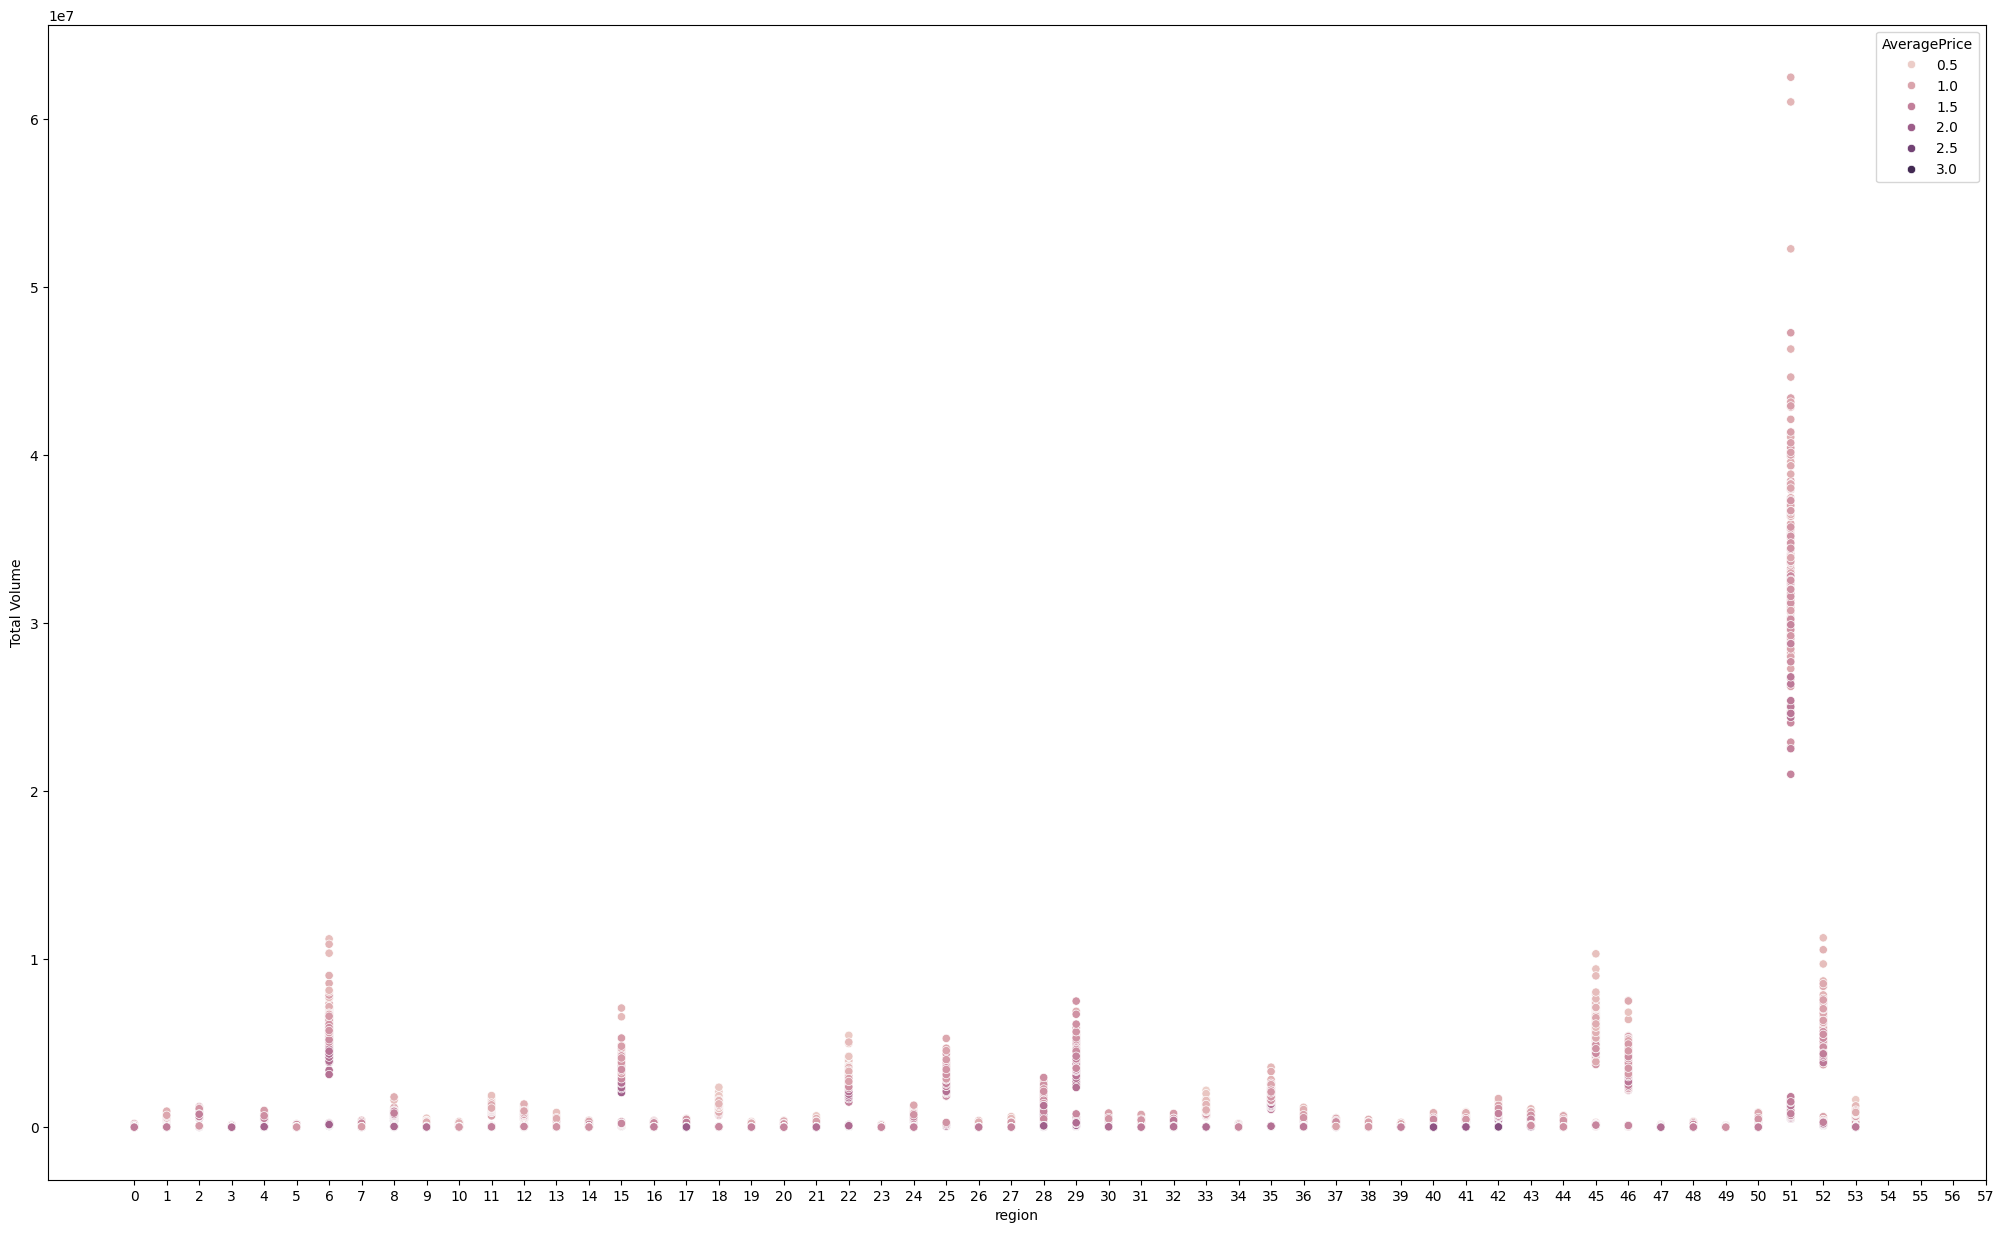

In [58]:
plt.figure(figsize = (25,15))
sns.scatterplot(x = df['region'],y = df['Total Volume'],hue = df['AveragePrice'])
plt.xticks(range(0,58))
plt.show()

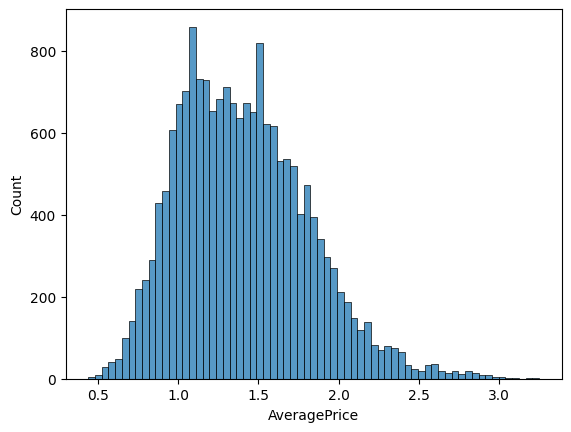

In [59]:
sns.histplot(df['AveragePrice'])
plt.show()

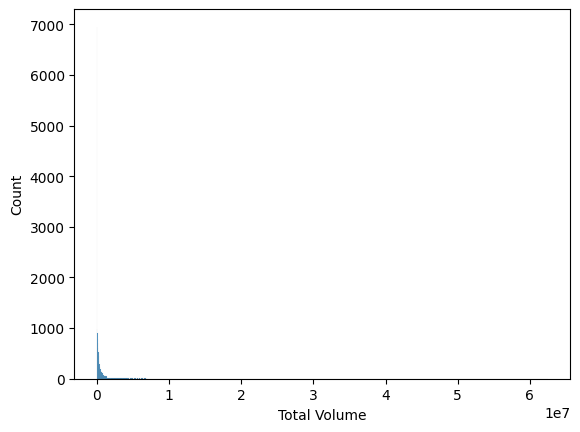

In [60]:
sns.histplot(df['Total Volume'])
plt.show()

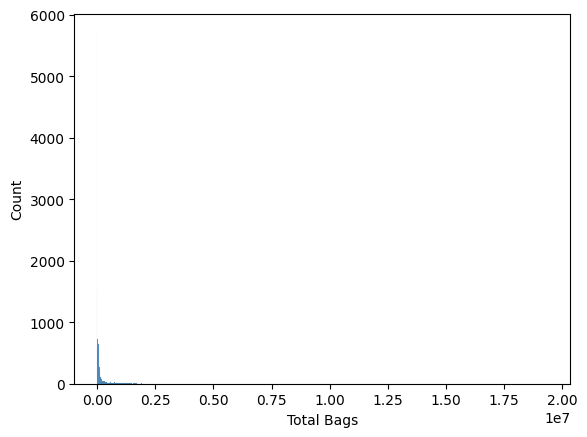

In [61]:
sns.histplot(df['Total Bags'])
plt.show()

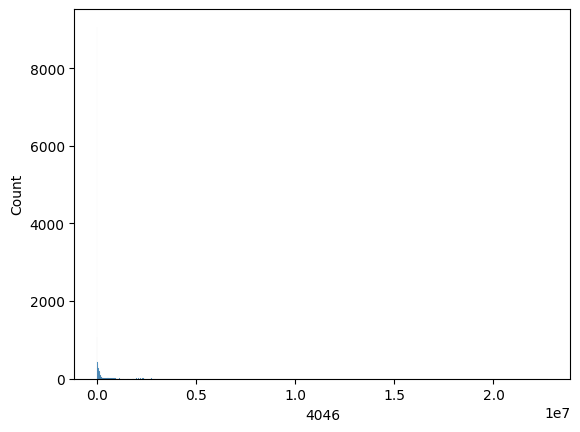

In [62]:
sns.histplot(df['4046'])
plt.show()

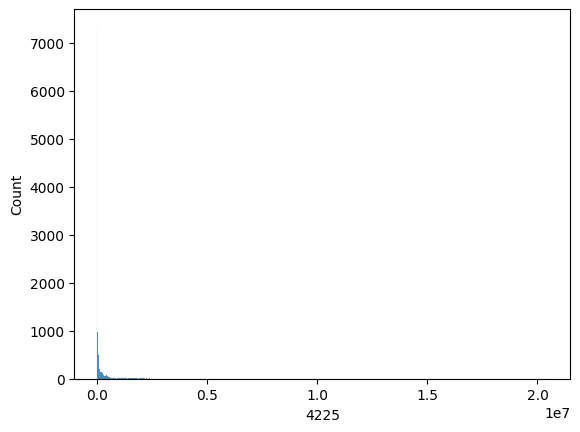

In [63]:
sns.histplot(df['4225'])
plt.show()

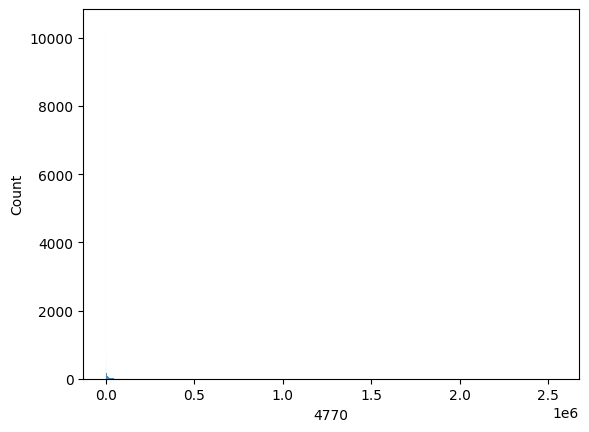

In [64]:
sns.histplot(df['4770'])
plt.show()

In [65]:
# Treating Outliers

In [67]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region', 'Year', 'Month'],
      dtype='object')

In [68]:
# Outliers are present in AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags

In [69]:
outliers_col = ['AveragePrice','Total Volume','4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [70]:
df[outliers_col].skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [71]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
# parameters: 
# method = box-cox or yeo-johnson

In [72]:
df[outliers_col] =  scaler.fit_transform(df[outliers_col])

In [73]:
df[outliers_col]

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.086248     -0.086605 -0.658619  0.307313 -0.247250   -0.524004   
1         -0.034022     -0.155746 -0.776870  0.231647 -0.201041   -0.485890   
2         -1.273938      0.179327 -0.731947  0.579503 -0.007072   -0.552018   
3         -0.793421      0.003876 -0.634200  0.415100 -0.148322   -0.695449   
4         -0.219440     -0.187640 -0.685293  0.224806 -0.137918   -0.669157   
...             ...           ...       ...       ...       ...         ...   
18244      0.640729     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   
18245      0.816307     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   
18246      1.147790     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   
18247      1.265876     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   
18248      0.618287     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   

       Small Bags  Large Bags  XLarge Bags  
0       -0.340627   -0.773351    -0.699849  
1       -0.306425   -0.763435    -0.699849  
2       -0.366303   -0.750820    -0.699849  
3       -0.496853   -0.691865    -0.699849  
4       -0.477201   -0.600975    -0.699849  
...           ...         ...          ...  
18244   -0.178839   -0.410859    -0.699849  
18245   -0.325977   -0.481465    -0.699849  
18246   -0.308728   -0.943486    -0.699849  
18247   -0.248932   -0.908510    -0.699849  
18248   -0.212590   -1.042250    -0.699849  

[18249 rows x 9 columns]

In [74]:
df[outliers_col].skew()

AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
dtype: float64

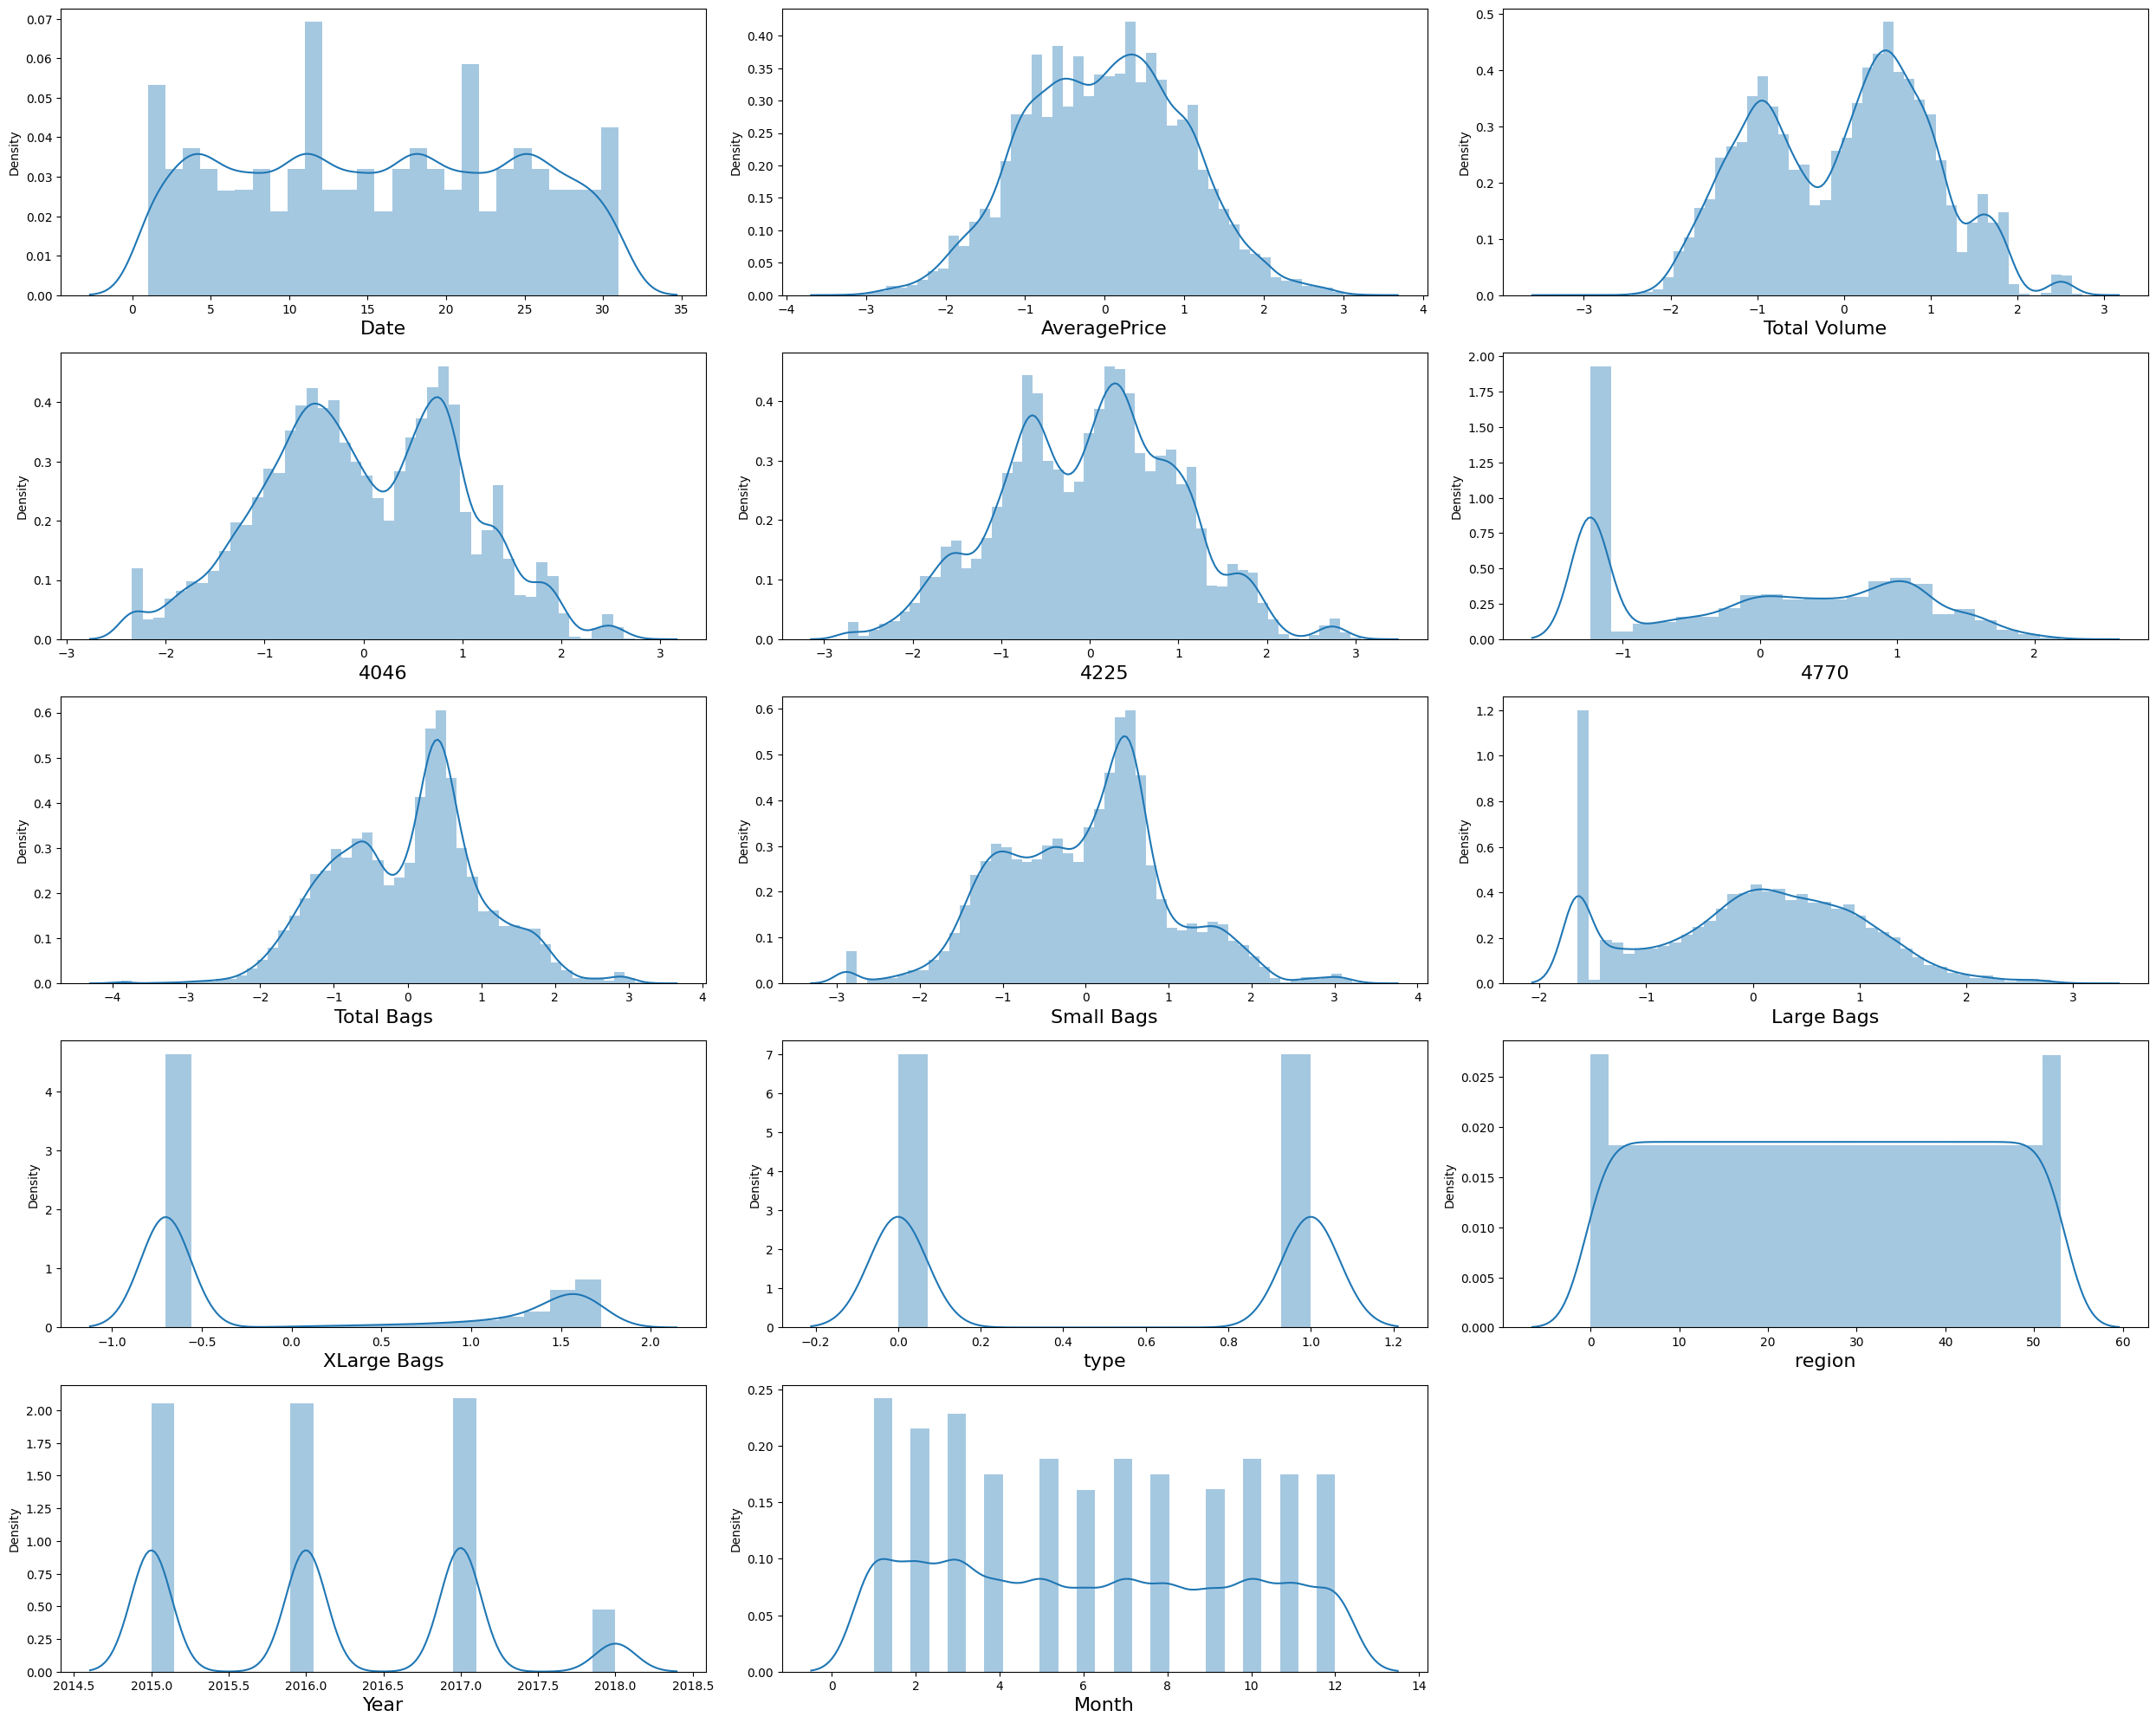

In [75]:
# Check distribution
plt.figure(figsize = (25,20))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber += 1
plt.tight_layout()
        

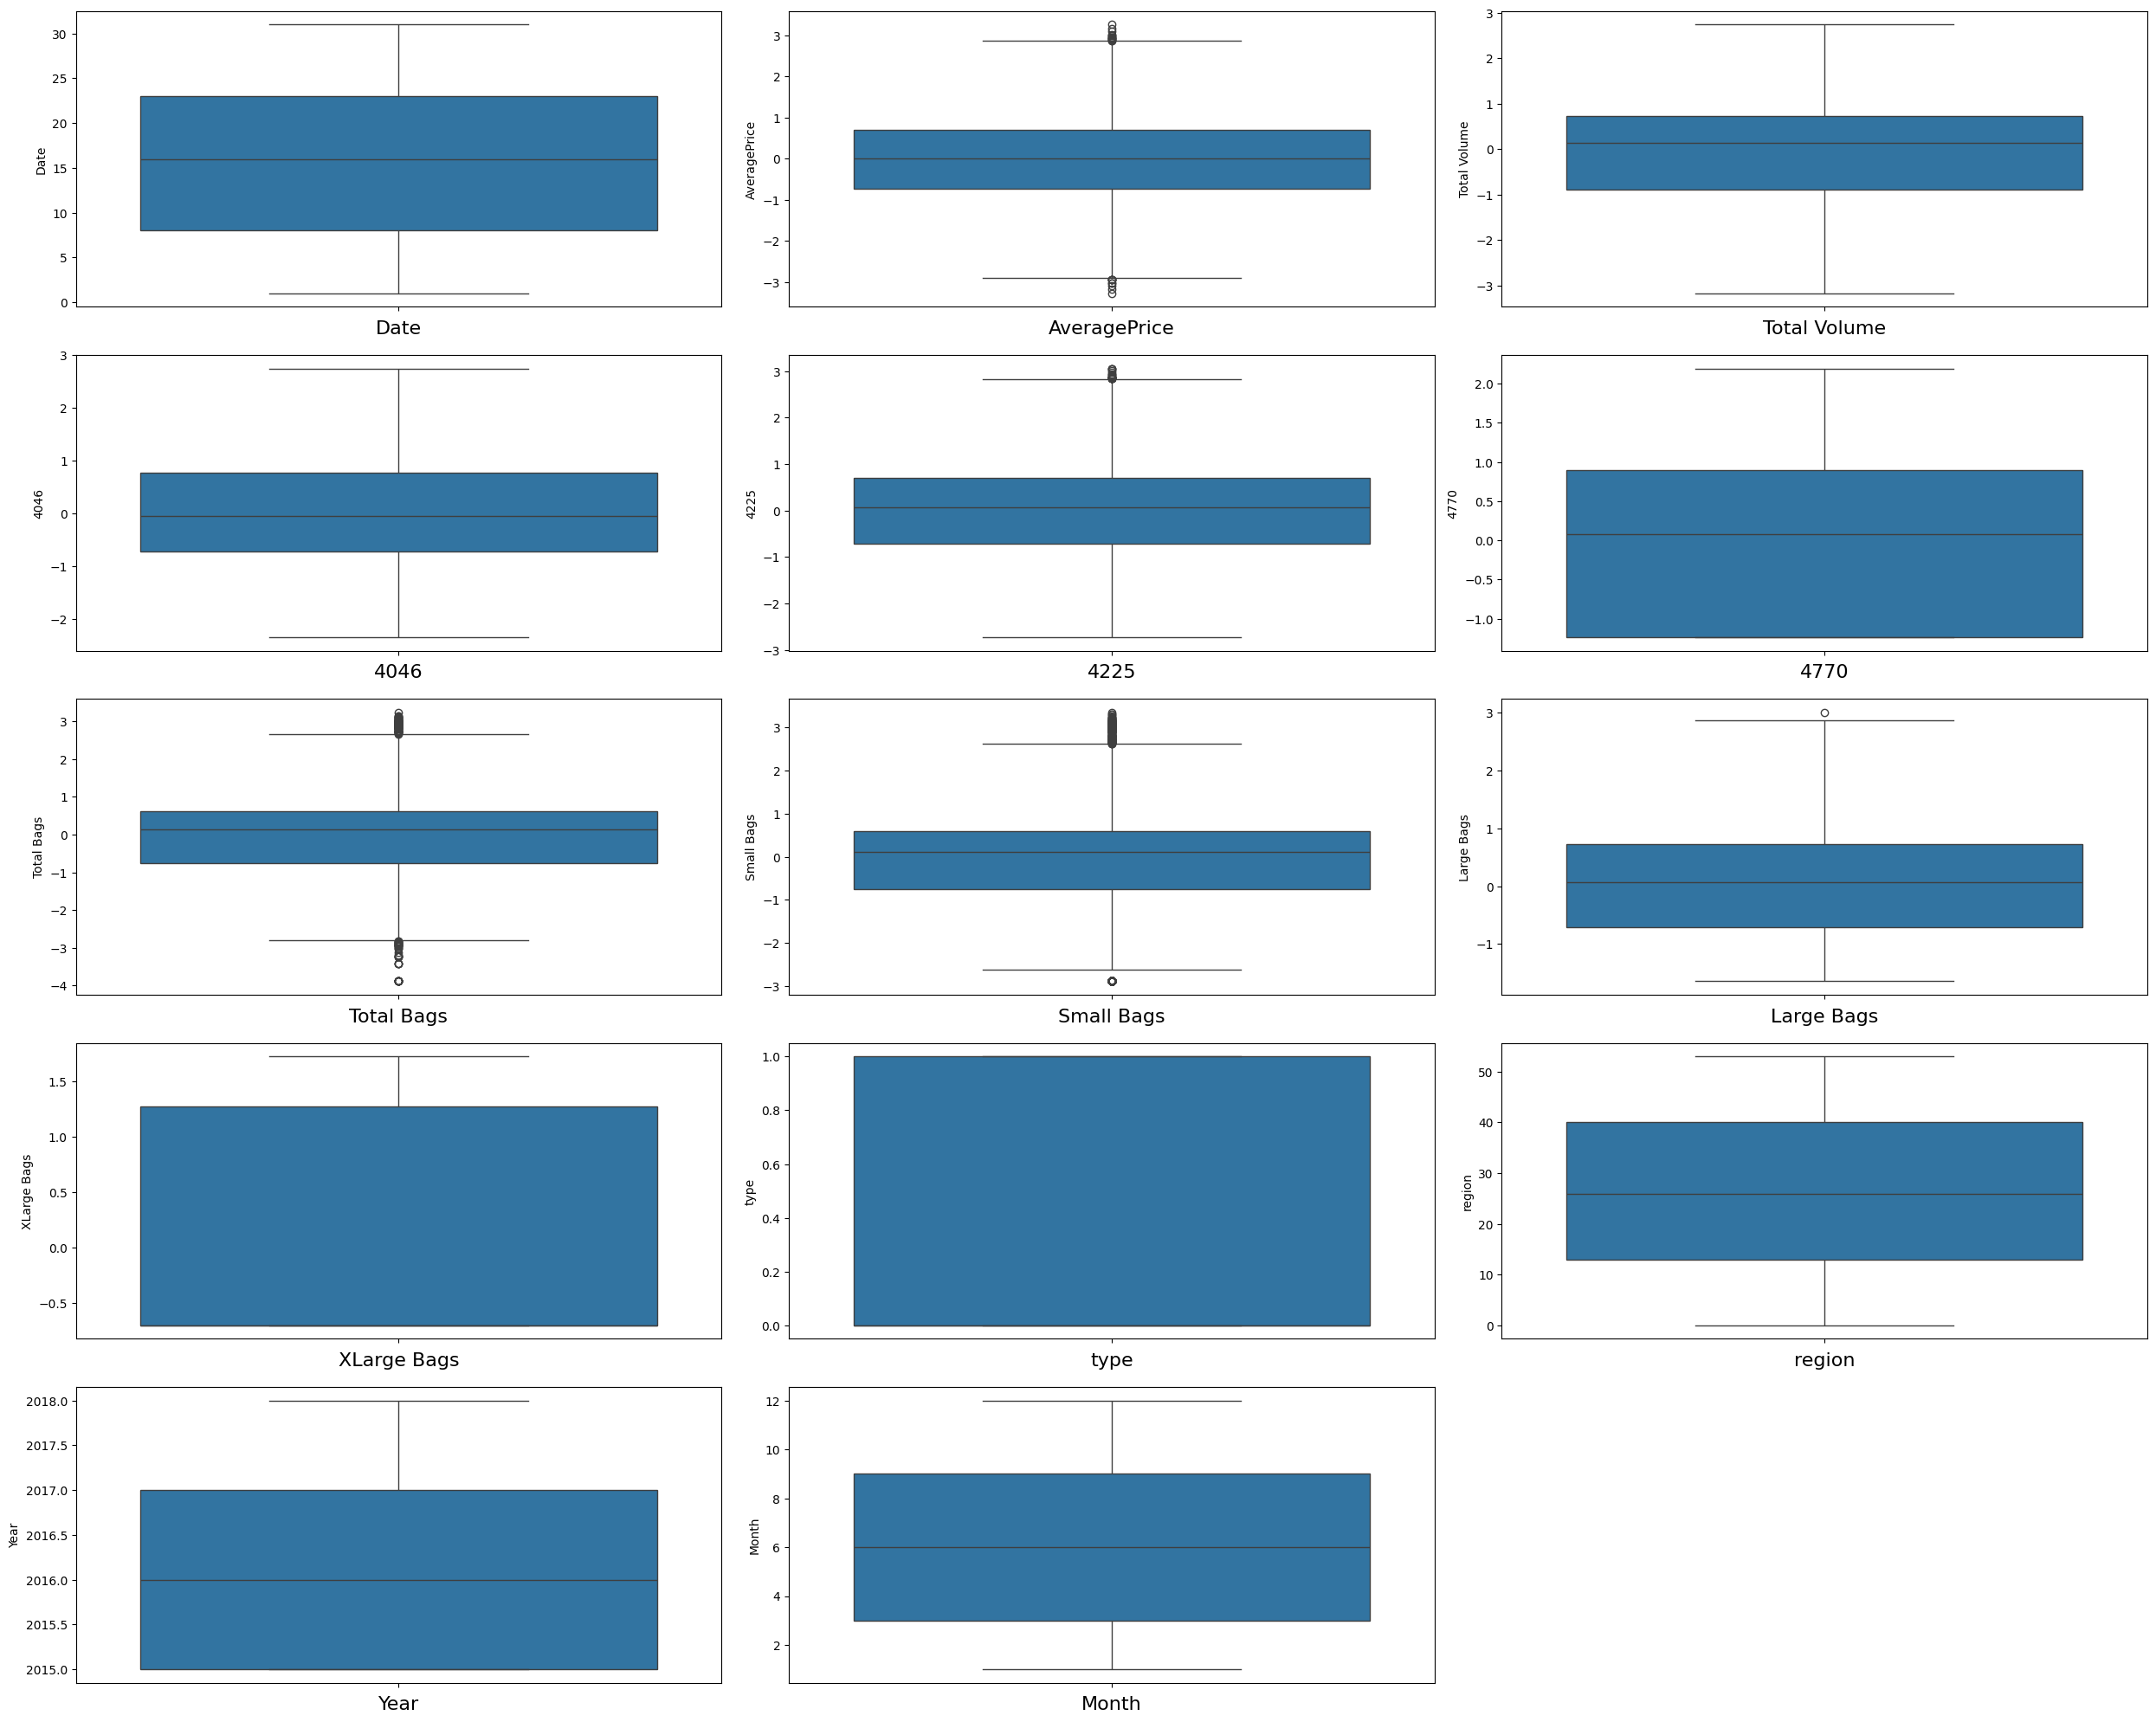

In [76]:
# Check distribution
plt.figure(figsize = (25,20))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber += 1
plt.tight_layout()
        

In [79]:
from scipy.stats import zscore
z_score = zscore(df)
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.skew()

Date            0.014026
AveragePrice   -0.001324
Total Volume   -0.024696
4046           -0.058482
4225           -0.070737
4770            0.022758
Total Bags     -0.010064
Small Bags     -0.055484
Large Bags     -0.119574
XLarge Bags     0.802396
type           -0.003197
region          0.005705
Year            0.215959
Month           0.103433
dtype: float64

In [80]:
# We reduced the skewness

In [81]:
df.shape

(18141, 14)

In [82]:
# Check for multicollinearity

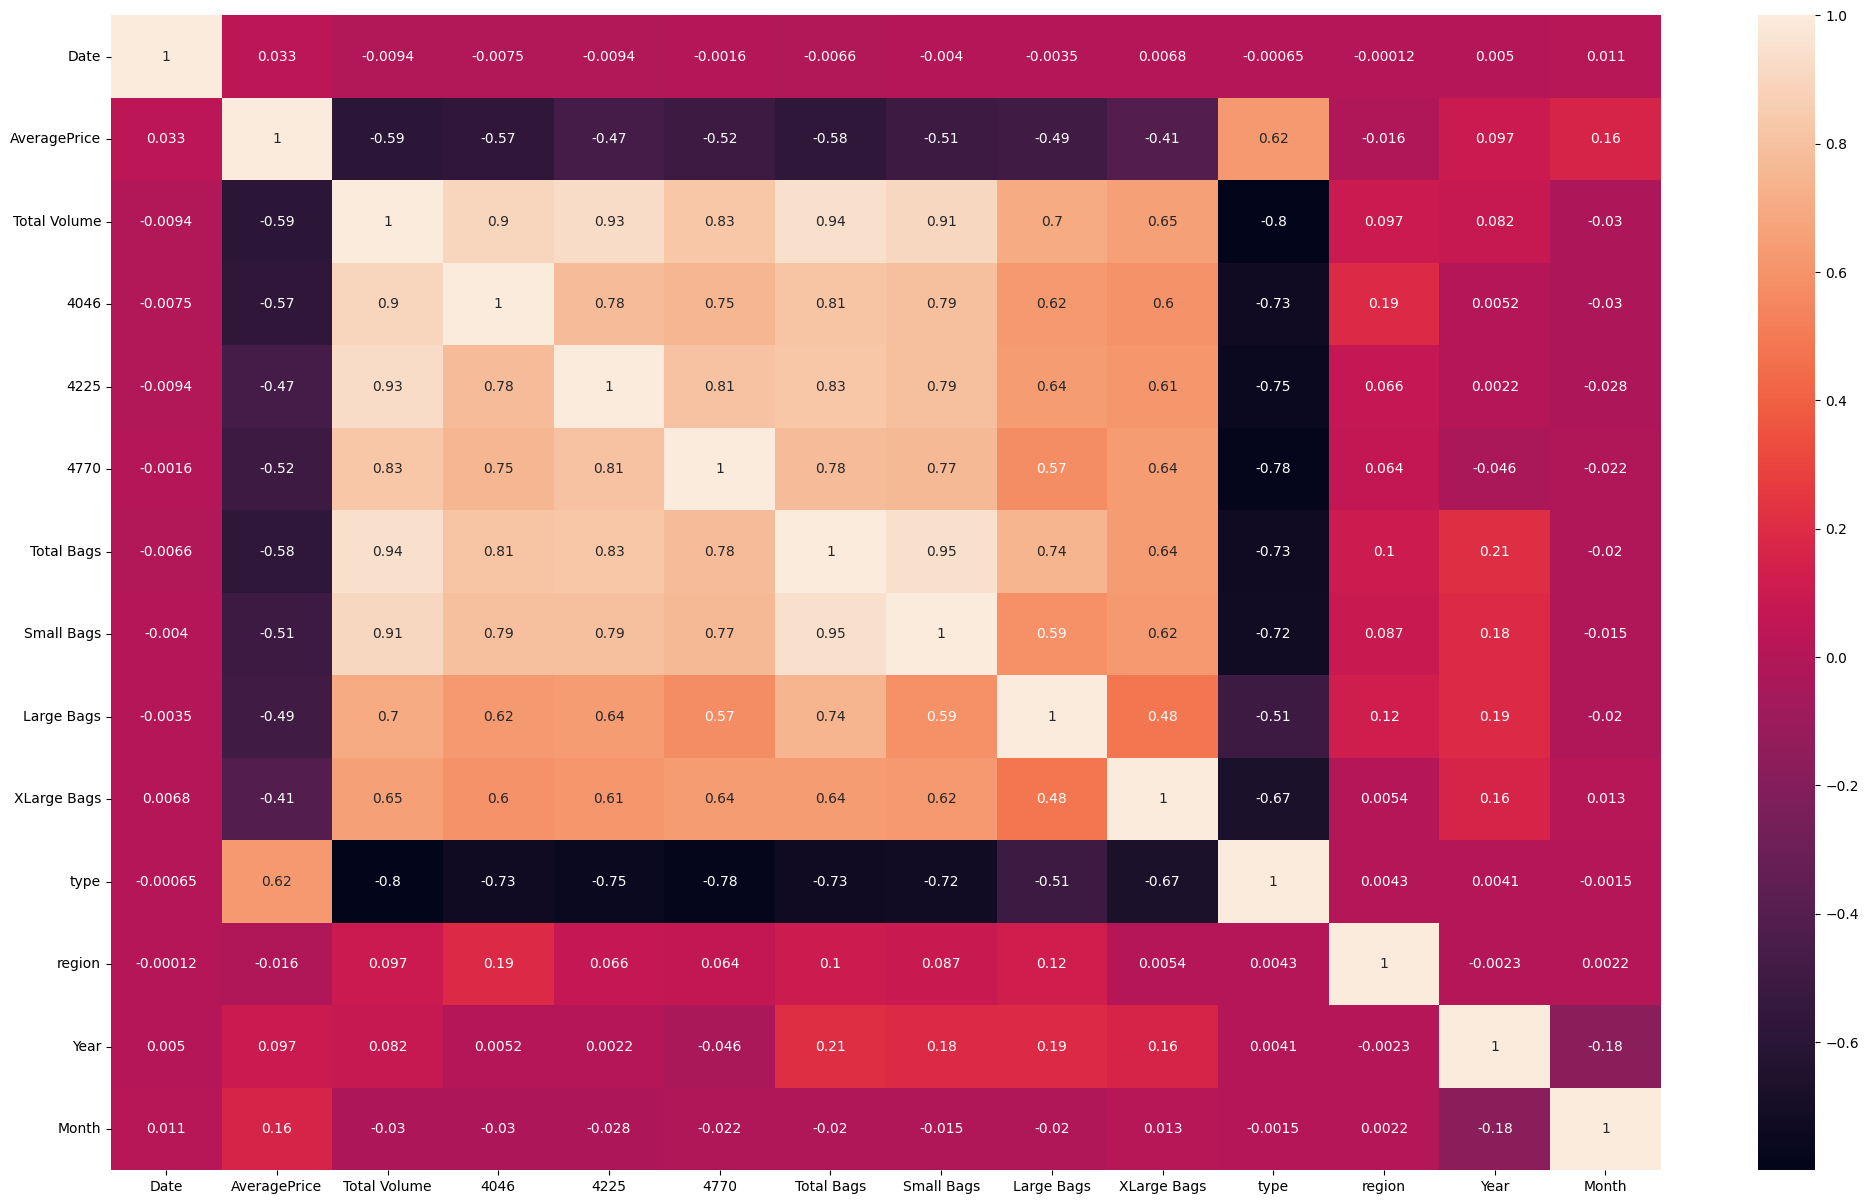

In [84]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

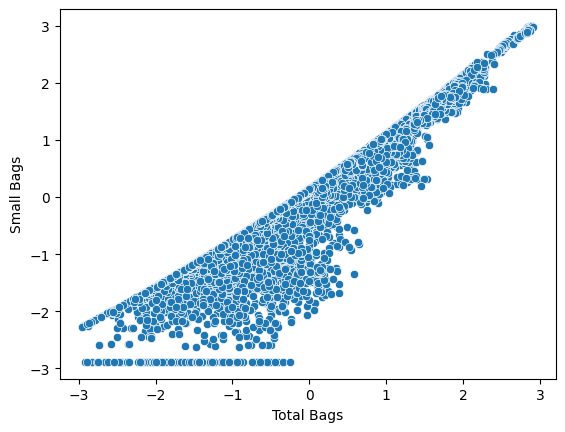

In [85]:
sns.scatterplot(x = 'Total Bags', y = 'Small Bags', data = df)
plt.show()

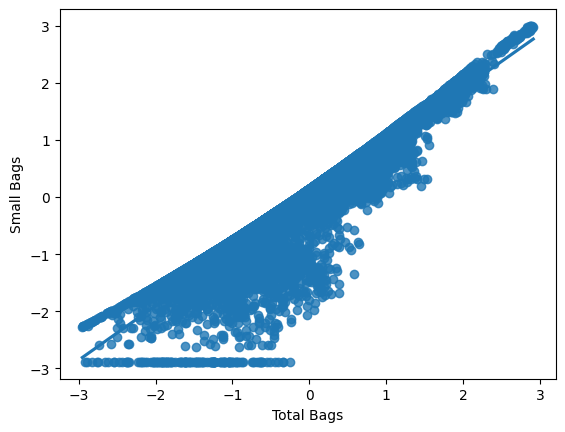

In [86]:
sns.regplot(x = 'Total Bags', y = 'Small Bags', data = df)
plt.show()

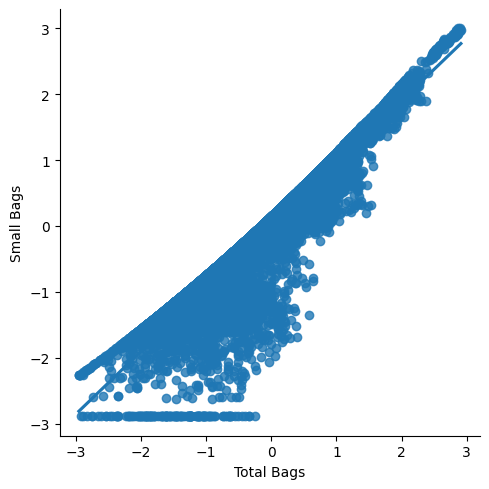

In [87]:
sns.lmplot(x = 'Total Bags', y = 'Small Bags', data = df)
plt.show()

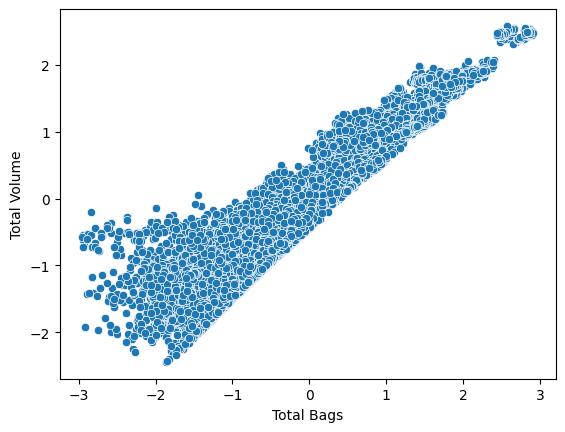

In [88]:
sns.scatterplot(x = 'Total Bags', y = 'Total Volume', data = df)
plt.show()

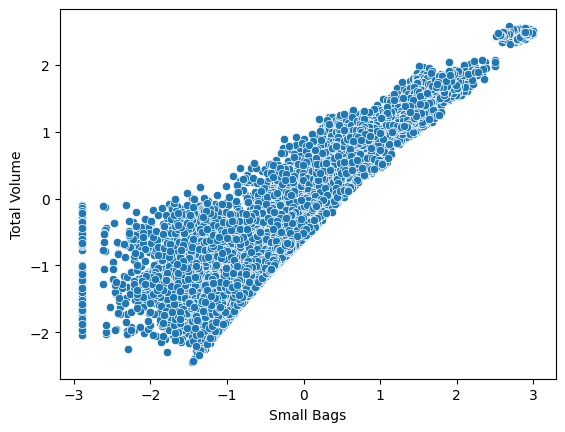

In [89]:
sns.scatterplot(x = 'Small Bags', y = 'Total Volume', data = df)
plt.show()

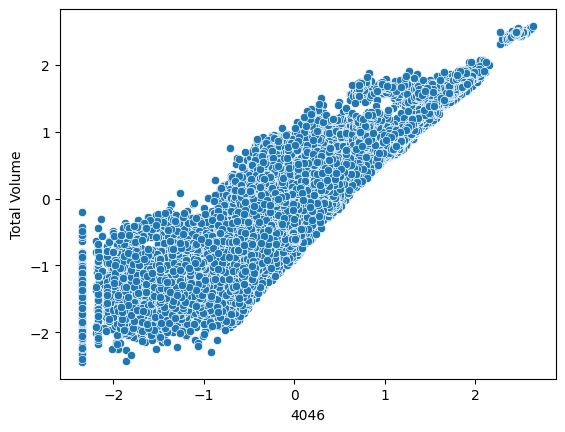

In [90]:
sns.scatterplot(x = '4046', y = 'Total Volume', data = df)
plt.show()

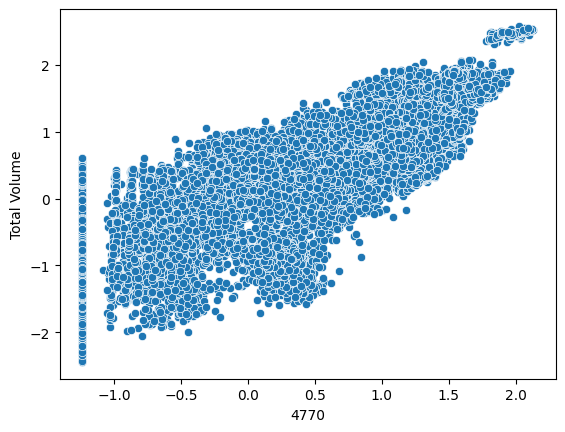

In [91]:
sns.scatterplot(x = '4770', y = 'Total Volume', data = df)
plt.show()

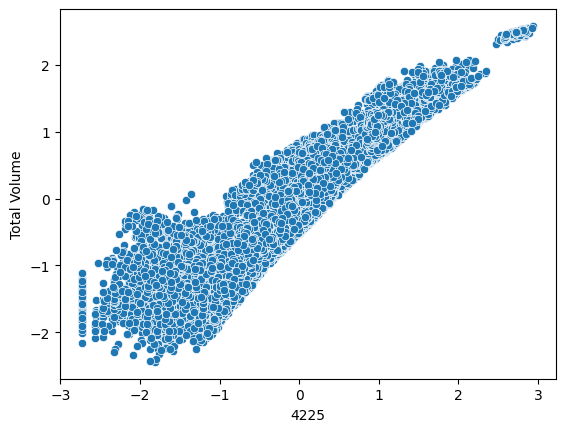

In [92]:
sns.scatterplot(x = '4225', y = 'Total Volume', data = df)
plt.show()

In [93]:
# we don't see any column fairely correlated so need solid evidence

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [96]:
df['region'].value_counts()

region
0.0     338
35.0    338
25.0    338
26.0    338
28.0    338
29.0    338
30.0    338
31.0    338
32.0    338
34.0    338
38.0    338
22.0    338
39.0    338
40.0    338
41.0    338
44.0    338
45.0    338
46.0    338
49.0    338
52.0    338
23.0    338
27.0    338
21.0    338
12.0    338
2.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
20.0    338
11.0    338
10.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
48.0    337
14.0    337
36.0    337
37.0    337
50.0    337
13.0    337
1.0     337
3.0     337
33.0    336
24.0    336
43.0    336
9.0     336
53.0    335
47.0    332
42.0    320
51.0    270
Name: count, dtype: int64

In [98]:
df['AveragePrice'].value_counts()

AveragePrice
-0.584545    200
-0.497752    196
-0.273800    192
-0.793421    191
-0.643299    190
            ... 
 2.820825      1
 2.990242      1
 2.516454      1
 2.899928      1
 2.886854      1
Name: count, Length: 250, dtype: int64

In [100]:
# Regression -> label = Average Price
# Classification -> label = region

# Regression -> label = Average Price

In [101]:
X = df.drop(columns = ['AveragePrice'],axis = 1)
y = df['AveragePrice']

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [105]:
X_scaled = scaler.fit_transform(X)
vif = pd.DataFrame()
vif['Features'] = pd.DataFrame(X.columns)
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif

Features      Score
0           Date   1.000739
1   Total Volume  52.621506
2           4046   7.250214
3           4225  11.026305
4           4770   4.212309
5     Total Bags  34.552552
6     Small Bags  15.169962
7     Large Bags   3.432754
8    XLarge Bags   2.145167
9           type   3.694454
10        region   1.100375
11          Year   1.382354
12         Month   1.054133

In [108]:
X = X.drop(columns = ['Total Volume'])

In [109]:
X_scaled = scaler.fit_transform(X)
vif = pd.DataFrame()
vif['Features'] = pd.DataFrame(X.columns)
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif

Features      Score
0          Date   1.000664
1          4046   3.967249
2          4225   4.493837
3          4770   4.194448
4    Total Bags  22.926569
5    Small Bags  15.157174
6    Large Bags   3.365151
7   XLarge Bags   2.126480
8          type   3.440526
9        region   1.090610
10         Year   1.379471
11        Month   1.052158

In [110]:
X = X.drop(columns = ['Total Bags'])

In [111]:
X_scaled = scaler.fit_transform(X)
vif = pd.DataFrame()
vif['Features'] = pd.DataFrame(X.columns)
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif

Features     Score
0          Date  1.000554
1          4046  3.936457
2          4225  4.330324
3          4770  4.194443
4    Small Bags  4.189660
5    Large Bags  1.970330
6   XLarge Bags  2.125323
7          type  3.431963
8        region  1.090591
9          Year  1.347333
10        Month  1.051318

In [112]:
# We solved the problem of Multicollinearity

In [113]:
# Feature Selection

In [114]:
from sklearn.feature_selection import SelectKBest,f_classif

In [118]:
best_features = SelectKBest(score_func = f_classif,k = 11)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_features = pd.DataFrame(X.columns)
features = pd.concat([df_scores,df_features],axis = 1)
features.columns = ['Score','Features']
print(features.nlargest(11,'Score'))

        Score     Features
7   54.336285         type
1   39.472501         4046
3   31.000496         4770
4   27.405823   Small Bags
5   25.802739   Large Bags
2   24.297848         4225
6   17.254369  XLarge Bags
9    3.282518         Year
10   3.087115        Month
8    1.356641       region
0    1.277662         Date


In [119]:
X = X.drop(columns = ['Year','Month','region','Date'],axis = 1)
y = df['AveragePrice']

In [120]:
# Data Standardization
X_scaled = scaler.fit_transform(X)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [122]:
# Find the Best Random State
maxAcc = 0
maxRS = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

In [123]:
print(maxAcc)
print(maxRS)

0.4826874176532554
116


In [124]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = maxRS)

In [125]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr_test = lr.predict(x_test)
pred_lr_train = lr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_lr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_lr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_lr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_lr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_lr_test)))

R2 SCORE ON TESTING DATA  0.4826874176532554
R2 SCORE ON TRAINING DATA  0.45341401323026687
MEAN ABSOLUTE ERROR  0.5675806261692836
MEAN SQUARED ERROR  0.524201841982646
ROOT MEAN SQUARED ERROR  0.7533794702334831


In [126]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
pred_ada_test = ada.predict(x_test)
pred_ada_train = ada.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_ada_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_ada_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_ada_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_ada_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_ada_test)))


R2 SCORE ON TESTING DATA  0.5181578509129443
R2 SCORE ON TRAINING DATA  0.5059407253624902
MEAN ABSOLUTE ERROR  0.5598090545175578
MEAN SQUARED ERROR  0.48825903470294907
ROOT MEAN SQUARED ERROR  0.7482038856605583


In [127]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb_test = gb.predict(x_test)
pred_gb_train = gb.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_gb_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_gb_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_gb_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_gb_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_gb_test)))


R2 SCORE ON TESTING DATA  0.6512764087084363
R2 SCORE ON TRAINING DATA  0.6440544849022433
MEAN ABSOLUTE ERROR  0.4605523760730796
MEAN SQUARED ERROR  0.3533676835552258
ROOT MEAN SQUARED ERROR  0.6786400931812676


In [128]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb_test = xgb.predict(x_test)
pred_xgb_train = xgb.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_xgb_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_xgb_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_xgb_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_xgb_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_xgb_test)))


R2 SCORE ON TESTING DATA  0.7689732222350527
R2 SCORE ON TRAINING DATA  0.8897788905671257
MEAN ABSOLUTE ERROR  0.3583818849010217
MEAN SQUARED ERROR  0.23410345424485862
ROOT MEAN SQUARED ERROR  0.598650052118115


In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge

In [130]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr_test = rfr.predict(x_test)
pred_rfr_train = rfr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_rfr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_rfr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_rfr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_rfr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_rfr_test)))


R2 SCORE ON TESTING DATA  0.7981299726688416
R2 SCORE ON TRAINING DATA  0.9690154881249476
MEAN ABSOLUTE ERROR  0.3241859065942454
MEAN SQUARED ERROR  0.20455841164356373
ROOT MEAN SQUARED ERROR  0.5693732577090755


In [131]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_dt_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_dt_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_dt_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_dt_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_dt_test)))


R2 SCORE ON TESTING DATA  0.5982719778919466
R2 SCORE ON TRAINING DATA  1.0
MEAN ABSOLUTE ERROR  0.4352831513584861
MEAN SQUARED ERROR  0.40707799568643516
ROOT MEAN SQUARED ERROR  0.6597599194847215


In [132]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn_test = dt.predict(x_test)
pred_knn_train = dt.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_knn_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_knn_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_knn_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_knn_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_knn_test)))


R2 SCORE ON TESTING DATA  0.5982719778919466
R2 SCORE ON TRAINING DATA  1.0
MEAN ABSOLUTE ERROR  0.4352831513584861
MEAN SQUARED ERROR  0.40707799568643516
ROOT MEAN SQUARED ERROR  0.6597599194847215


In [133]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso_test = lasso.predict(x_test)
pred_lasso_train = lasso.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_lasso_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_lasso_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_lasso_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_lasso_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_lasso_test)))


R2 SCORE ON TESTING DATA  -0.0001145121395578208
R2 SCORE ON TRAINING DATA  0.0
MEAN ABSOLUTE ERROR  0.826460651060854
MEAN SQUARED ERROR  1.013433439176875
ROOT MEAN SQUARED ERROR  0.9090988125945683


In [134]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred_ridge_test = ridge.predict(x_test)
pred_ridge_train = ridge.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_ridge_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_ridge_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_ridge_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_ridge_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_ridge_test)))


R2 SCORE ON TESTING DATA  0.48268516940802486
R2 SCORE ON TRAINING DATA  0.4534140014942306
MEAN ABSOLUTE ERROR  0.5675835383417157
MEAN SQUARED ERROR  0.5242041201686622
ROOT MEAN SQUARED ERROR  0.7533814029704448


In [135]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr_test = etr.predict(x_test)
pred_etr_train = etr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_etr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_etr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_etr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_etr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_etr_test)))


R2 SCORE ON TESTING DATA  0.8164788022464488
R2 SCORE ON TRAINING DATA  1.0
MEAN ABSOLUTE ERROR  0.30757085322159106
MEAN SQUARED ERROR  0.1859652233256344
ROOT MEAN SQUARED ERROR  0.5545907078392056


In [136]:
from sklearn.model_selection import cross_val_score

In [137]:
score = cross_val_score(lr,X_scaled,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_lr_test) - score.mean())

[-0.54292214  0.04168395  0.4335346   0.03000373  0.06534413]
0.005528853327135108
Difference between R2 score and cross validation score is:  0.4771585643261203


In [138]:
score1 = cross_val_score(ada,X_scaled,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_ada_test) - score1.mean())

[-0.31985055  0.12568036  0.47518172  0.10859824 -0.04726587]
0.06846877988588965
Difference between R2 score and cross validation score is:  0.4496890710270547


In [139]:
score2 = cross_val_score(gb,X_scaled,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_gb_test) - score2.mean())

[-0.04102218  0.24266931  0.55283588  0.28387582  0.04085905]
0.21584357712965777
Difference between R2 score and cross validation score is:  0.43543283157877855


In [140]:
score3 = cross_val_score(xgb,X_scaled,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_xgb_test) - score3.mean())

[-0.0716403   0.35410563  0.54625522  0.26952981 -0.12738289]
0.19417349492841987
Difference between R2 score and cross validation score is:  0.5747997273066329


In [141]:
score4 = cross_val_score(rfr,X_scaled,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_rfr_test) - score4.mean())

[-0.03501012  0.36227291  0.56523253  0.25683982 -0.05128664]
0.21960969715767065
Difference between R2 score and cross validation score is:  0.5785202755111709


In [142]:
score5 = cross_val_score(dt,X_scaled,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_dt_test) - score5.mean())

[-1.16180816  0.00475382  0.19279783 -0.38596606 -0.52907167]
-0.37585884800909514
Difference between R2 score and cross validation score is:  0.9741308259010417


In [143]:
score6 = cross_val_score(knn,X_scaled,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_knn_test) - score6.mean())

[-0.47757437  0.31164392  0.46477472  0.17281673 -0.13495848]
0.06734050265322937
Difference between R2 score and cross validation score is:  0.5309314752387173


In [144]:
score7 = cross_val_score(lasso,X_scaled,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_lasso_test) - score7.mean())

[-2.81800778 -0.58494675 -0.02968463 -0.59782697 -0.99094161]
-1.0042815491824348
Difference between R2 score and cross validation score is:  1.004167037042877


In [145]:
score8 = cross_val_score(ridge,X_scaled,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_ridge_test) - score8.mean())

[-0.54293971  0.04175358  0.43357173  0.03000771  0.06529341]
0.005537344222388696
Difference between R2 score and cross validation score is:  0.47714782518563614


In [146]:
score9 = cross_val_score(etr,X_scaled,y)
print(score9)
print(score9.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_etr_test) - score9.mean())

[ 0.08274603  0.3863643   0.57925401  0.30495919 -0.02541393]
0.26558192012079146
Difference between R2 score and cross validation score is:  0.5508968821256572


Difference between R2 score and cross validation score is:  0.43543283157877855 for GradientBoostingRegressor so it is best fitted model.


In [147]:
help(gb)

Help on GradientBoostingRegressor in module sklearn.ensemble._gb object:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  This estimator builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage a regression tree is fit on the negative gradient of the given
 |  loss function.
 |  
 |  :class:`sklearn.ensemble.HistGradientBoostingRegressor` is a much faster
 |  variant of this algorith

In [148]:
# Hyper parameter Tuning

In [149]:
from sklearn.model_selection import GridSearchCV

In [174]:
param_grid = {
    'n_estimators':[100,200],
    'min_samples_split': [2],
    'min_samples_leaf':[1] 
    
}

In [175]:
grid_search = GridSearchCV(estimator = GradientBoostingRegressor(),param_grid = param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100, 200]})

In [176]:
grid_search.best_estimator_

GradientBoostingRegressor(n_estimators=200)

In [177]:
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [178]:
grid_search.best_score_

0.6554651658549931

In [179]:
final_model = grid_search.best_estimator_
pred = final_model.predict(x_test)
r2_score(y_test,pred)

0.6845043260184747

In [180]:
import joblib

joblib.dump(final_model,'Avacado_Project_Regression.pkl')

['Avacado_Project_Regression.pkl']

In [181]:
model = joblib.load('Avacado_Project_Regression.pkl')

# Classification -> label = region

In [182]:
X = df.drop(columns = ['region'],axis = 1)
y = df['region']

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [184]:
X_scaled = scaler.fit_transform(X)
vif = pd.DataFrame()
vif['Features'] = pd.DataFrame(X.columns)
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif

Features      Score
0           Date   1.002469
1   AveragePrice   2.333649
2   Total Volume  53.152323
3           4046   6.866438
4           4225  11.966686
5           4770   4.222856
6     Total Bags  35.402498
7     Small Bags  15.705358
8     Large Bags   3.457181
9    XLarge Bags   2.137717
10          type   4.152288
11          Year   1.528396
12         Month   1.146969

In [185]:
X = X.drop(columns = ['Total Volume'])

In [186]:
X_scaled = scaler.fit_transform(X)
vif = pd.DataFrame()
vif['Features'] = pd.DataFrame(X.columns)
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif

Features      Score
0           Date   1.002459
1   AveragePrice   2.289840
2           4046   3.814890
3           4225   4.865697
4           4770   4.208319
5     Total Bags  24.995340
6     Small Bags  15.705301
7     Large Bags   3.375865
8    XLarge Bags   2.121591
9           type   3.972862
10          Year   1.528395
11         Month   1.146956

In [187]:
X = X.drop(columns = ['Total Bags'])

In [188]:
X_scaled = scaler.fit_transform(X)
vif = pd.DataFrame()
vif['Features'] = pd.DataFrame(X.columns)
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif

Features     Score
0           Date  1.002454
1   AveragePrice  2.100283
2           4046  3.803902
3           4225  4.546390
4           4770  4.206913
5     Small Bags  4.248073
6     Large Bags  2.175734
7    XLarge Bags  2.120921
8           type  3.954814
9           Year  1.448460
10         Month  1.133377

In [189]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features = SelectKBest(score_func = f_classif,k = 11)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_features = pd.DataFrame(X.columns)
features = pd.concat([df_scores,df_features],axis = 1)
features.columns = ['Score','Features']
print(features.nlargest(11,'Score'))

         Score      Features
2   214.519629          4046
6   192.789120    Large Bags
3   176.344847          4225
5   161.260954    Small Bags
4    97.067941          4770
1    72.462675  AveragePrice
7    34.190777   XLarge Bags
8     0.344580          type
9     0.171781          Year
10    0.063954         Month
0     0.003205          Date


In [190]:
X = X.drop(columns = ['Year','Month','type','Date'],axis = 1)
y = df['region']

In [192]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30)

In [193]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc

In [194]:
# Train models
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
knc = KNeighborsClassifier()

In [195]:
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.9123645048686386
[[ 94   0   0 ...   0   0   0]
 [  0  99   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ...  80   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   2   2 ...   0   0  84]]
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        98
         1.0       0.82      0.88      0.85       112
         2.0       0.96      0.98      0.97       106
         3.0       0.97      0.88      0.92       109
         4.0       0.96      0.97      0.97       101
         5.0       0.92      0.86      0.89        98
         6.0       0.98      1.00      0.99        91
         7.0       0.80      0.92      0.86        76
         8.0       0.95      0.99      0.97       105
         9.0       0.93      0.93      0.93        98
        10.0       0.84      0.90      0.87       102
        11.0       0.95      0.95      0.95        94
        12.0       0.97      0.91      0.94       123
        13.0       0.85      0.8

In [196]:
etc.fit(x_train,y_train)
pred_etc = etc.predict(x_test)
print(accuracy_score(y_test,pred_etc))
print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

0.924857615285688
[[ 96   0   0 ...   0   0   0]
 [  0 103   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ...  80   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   1   0 ...   0   0  90]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91        98
         1.0       0.87      0.92      0.90       112
         2.0       0.99      1.00      1.00       106
         3.0       0.93      0.92      0.92       109
         4.0       0.98      0.96      0.97       101
         5.0       0.94      0.87      0.90        98
         6.0       1.00      1.00      1.00        91
         7.0       0.92      0.96      0.94        76
         8.0       0.96      1.00      0.98       105
         9.0       0.87      0.92      0.89        98
        10.0       0.86      0.91      0.89       102
        11.0       0.96      0.94      0.95        94
        12.0       0.94      0.96      0.95       123
        13.0       0.85      0.80

In [197]:
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.7993753444791475
[[ 84   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   1]
 [  0   0  95 ...   0   0   2]
 ...
 [  0   0   0 ...  80   0   0]
 [  0   0   0 ...   0 101   0]
 [  0   2   1 ...   0   0  70]]
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82        98
         1.0       0.81      0.79      0.80       112
         2.0       0.93      0.90      0.91       106
         3.0       0.81      0.76      0.79       109
         4.0       0.89      0.84      0.86       101
         5.0       0.76      0.76      0.76        98
         6.0       0.99      0.93      0.96        91
         7.0       0.71      0.82      0.76        76
         8.0       0.89      0.98      0.93       105
         9.0       0.89      0.78      0.83        98
        10.0       0.71      0.76      0.74       102
        11.0       0.83      0.79      0.81        94
        12.0       0.83      0.65      0.73       123
        13.0       0.72      0.7

In [198]:
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.7727356237369097
[[ 88   0   0 ...   0   0   0]
 [  0  54   0 ...   0   0   0]
 [  0   0 103 ...   0   0   0]
 ...
 [  0   0   0 ...  80   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   4   2 ...   0   0  65]]
              precision    recall  f1-score   support

         0.0       0.65      0.90      0.76        98
         1.0       0.46      0.48      0.47       112
         2.0       0.93      0.97      0.95       106
         3.0       0.81      0.72      0.77       109
         4.0       0.93      0.73      0.82       101
         5.0       0.78      0.63      0.70        98
         6.0       0.97      0.98      0.97        91
         7.0       0.72      0.78      0.75        76
         8.0       0.94      0.96      0.95       105
         9.0       0.73      0.83      0.78        98
        10.0       0.58      0.71      0.64       102
        11.0       0.77      0.77      0.77        94
        12.0       0.91      0.90      0.91       123
        13.0       0.54      0.5

In [201]:
abc.fit(x_train,y_train)
pred_abc = abc.predict(x_test)
print(accuracy_score(y_test,pred_abc))
print(confusion_matrix(y_test,pred_abc))
print(classification_report(y_test,pred_abc))

0.04648171963990447
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ... 25  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        98
         1.0       0.00      0.00      0.00       112
         2.0       0.00      0.00      0.00       106
         3.0       0.00      0.00      0.00       109
         4.0       0.00      0.00      0.00       101
         5.0       0.00      0.00      0.00        98
         6.0       0.52      0.36      0.43        91
         7.0       0.02      0.99      0.05        76
         8.0       0.00      0.00      0.00       105
         9.0       0.00      0.00      0.00        98
        10.0       0.00      0.00      0.00       102
        11.0       0.00      0.00      0.00        94
        12.0       0.00      0.00      0.00       123
        13.0       0.00      0.00      0.00        90
        14.0 

In [202]:
knc.fit(x_train,y_train)
pred_knc = knc.predict(x_test)
print(accuracy_score(y_test,pred_knc))
print(confusion_matrix(y_test,pred_knc))
print(classification_report(y_test,pred_knc))

0.6000367444424031
[[80  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 94 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 93  0]
 [ 0  5  2 ...  0  0 48]]
              precision    recall  f1-score   support

         0.0       0.46      0.82      0.59        98
         1.0       0.39      0.54      0.45       112
         2.0       0.68      0.89      0.77       106
         3.0       0.66      0.71      0.68       109
         4.0       0.59      0.72      0.65       101
         5.0       0.42      0.53      0.47        98
         6.0       0.72      0.87      0.79        91
         7.0       0.43      0.75      0.55        76
         8.0       0.75      0.79      0.77       105
         9.0       0.35      0.54      0.42        98
        10.0       0.32      0.47      0.38       102
        11.0       0.55      0.78      0.64        94
        12.0       0.89      0.76      0.82       123
        13.0       0.40      0.42      0.41        90
        14.0  

In [209]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = knc.predict(x_test)
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

0.6000367444424031
[[80  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 94 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 93  0]
 [ 0  5  2 ...  0  0 48]]
              precision    recall  f1-score   support

         0.0       0.46      0.82      0.59        98
         1.0       0.39      0.54      0.45       112
         2.0       0.68      0.89      0.77       106
         3.0       0.66      0.71      0.68       109
         4.0       0.59      0.72      0.65       101
         5.0       0.42      0.53      0.47        98
         6.0       0.72      0.87      0.79        91
         7.0       0.43      0.75      0.55        76
         8.0       0.75      0.79      0.77       105
         9.0       0.35      0.54      0.42        98
        10.0       0.32      0.47      0.38       102
        11.0       0.55      0.78      0.64        94
        12.0       0.89      0.76      0.82       123
        13.0       0.40      0.42      0.41        90
        14.0  

In [210]:
final_model = etc

In [211]:
import joblib
joblib.dump(final_model,'Avocado_Project_Classification.pkl')

['Avocado_Project_Classification.pkl']

In [212]:
model = joblib.load('Avocado_Project_Classification.pkl')

In [213]:
model.predict(x_test)

array([18., 42.,  9., ...,  6., 51., 40.])

In [214]:
accuracy_score(y_test,model.predict(x_test))

0.924857615285688

# THE end